In [44]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [45]:
# Import the data and print the first three rows 
recipe = pd.read_csv("C:/Users/awand/Downloads/RAW_recipes.csv/RAW_recipes.csv")
recipe.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


In [46]:
print(recipe.shape)

(231637, 12)


In [47]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [48]:
# 1. One column for each nutrition type
recipe[['calories','total fat (PDV%)','sugar (PDV%)','sodium (PDV%)',
         'protein (PDV%)','saturated fat (PDV%)','carbohydrates (PDV%)']] = recipe.nutrition.str.split(",",expand=True)

# 2. Cleaning the content of "calories" and "carbohydrates (PDV%)"
recipe['calories'] =  recipe['calories'].apply(lambda x: x.replace('[',''))
recipe['carbohydrates (PDV%)'] =  recipe['carbohydrates (PDV%)'].apply(lambda x: x.replace(']','')) 

# 3. Changer le type des colonnes en float
recipe[['calories','total fat (PDV%)','sugar (PDV%)','sodium (PDV%)','protein (PDV%)','saturated fat (PDV%)',
    'carbohydrates (PDV%)']] = recipe[['calories','total fat (PDV%)','sugar (PDV%)','sodium (PDV%)','protein (PDV%)',
                                  'saturated fat (PDV%)','carbohydrates (PDV%)']].astype('float')

recipe[['calories','total fat (PDV%)','sugar (PDV%)','sodium (PDV%)','protein (PDV%)','saturated fat (PDV%)',
    'carbohydrates (PDV%)']].isna().sum()

calories                0
total fat (PDV%)        0
sugar (PDV%)            0
sodium (PDV%)           0
protein (PDV%)          0
saturated fat (PDV%)    0
carbohydrates (PDV%)    0
dtype: int64

In [49]:
# Missing values 
print("Total number of missing values:", recipe.isnull().sum().sum())
#print("Same with the na function", recipe.isna().sum())

Total number of missing values: 4980


In [50]:
# In details
print("Per variable", recipe.isna().sum())

Per variable name                       1
id                         0
minutes                    0
contributor_id             0
submitted                  0
tags                       0
nutrition                  0
n_steps                    0
steps                      0
description             4979
ingredients                0
n_ingredients              0
calories                   0
total fat (PDV%)           0
sugar (PDV%)               0
sodium (PDV%)              0
protein (PDV%)             0
saturated fat (PDV%)       0
carbohydrates (PDV%)       0
dtype: int64


In [51]:
# Suppression des lignes avec des valeurs manquantes dans n'importe quelle colonne
recipe_nona = recipe.dropna()

# Afficher le résultat
print("Nombre de lignes après suppression :", len(recipe_nona))


Nombre de lignes après suppression : 226657


In [52]:
recipe_nona.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (PDV%),sugar (PDV%),sodium (PDV%),protein (PDV%),saturated fat (PDV%),carbohydrates (PDV%)
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


les stats descriptives des variables numériques montrent qu'il y a des valeurs irréalistes pour la variable minutes. Pour la variable n_steps, le minimum avec 0 étape peut paraître égalment irréaliste. Pour la variable du nombre d'ingrédients rien de particuliers jusqu'à présent montre quelque chose d'irraéliste. Il est posssible d'avoir une recette avec un seul ingrédient ou avec 43 ingrédients. 

In [53]:
recipe_nona.describe()

,id,minutes,contributor_id,n_steps,n_ingredients,calories,total fat (PDV%),sugar (PDV%),sodium (PDV%),protein (PDV%),saturated fat (PDV%),carbohydrates (PDV%)
count,226657.000000,2.266570e+05,2.266570e+05,226657.000000,226657.000000,226657.000000,226657.000000,226657.000000,226657.000000,226657.000000,226657.000000,226657.000000
mean,226097.564368,9.602472e+03,5.655471e+06,9.773927,9.054170,471.662774,35.936406,83.447059,30.063581,34.600458,45.364816,15.450752
std,139802.640862,4.510715e+06,1.008784e+08,5.999824,3.740942,1194.845397,77.733347,807.100380,131.863087,58.483655,97.638329,82.482854
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,105707.000000,2.000000e+01,5.810400e+04,6.000000,6.000000,174.500000,8.000000,9.000000,5.000000,7.000000,7.000000,4.000000
50%,211971.000000,4.000000e+01,1.807890e+05,9.000000,9.000000,313.300000,20.000000,25.000000,15.000000,18.000000,23.000000,9.000000
75%,336737.000000,6.500000e+01,4.091060e+05,12.000000,11.000000,518.700000,41.000000,68.000000,33.000000,51.000000,52.000000,16.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000,434360.200000,17183.000000,362729.000000,29338.000000,6552.000000,10395.000000,36098.000000


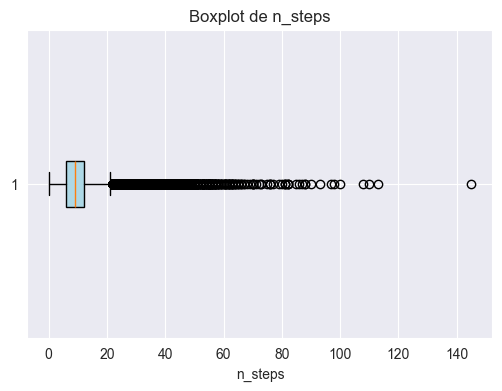

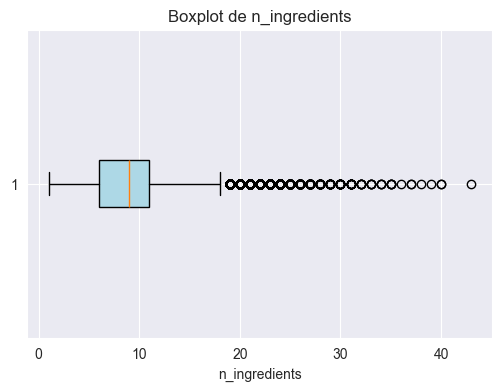

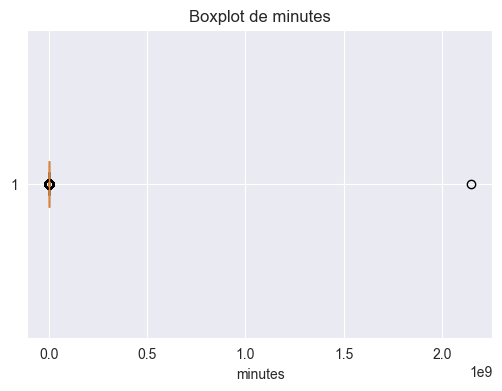

In [54]:
# Liste des colonnes pour lesquelles créer des boxplots
numeric_columns = ['n_steps', 'n_ingredients', 'minutes']

# Création des boxplots
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(recipe_nona[column], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)
    plt.grid(True)
    plt.show()

In [55]:
# Average time 
avg_time = recipe_nona['minutes'].mean()
print("Average time for recipes: ", avg_time)


Average time for recipes:  9602.472193667083


In [56]:
# Get hours with floor division 
hours = avg_time // 60

# Get minutes with modulus
minutes = avg_time % 60

print("Average time is {} hours and {} minutes!".format(round(hours),round(minutes)))

Average time is 160 hours and 2 minutes!


In [57]:
print('Maximum cooking time', recipe_nona['minutes'].max())
print('Minimum cooking time', recipe_nona['minutes'].min())

Maximum cooking time 2147483647
Minimum cooking time 0


Skewness de minutes : 476.082
La distribution est asymétrique.


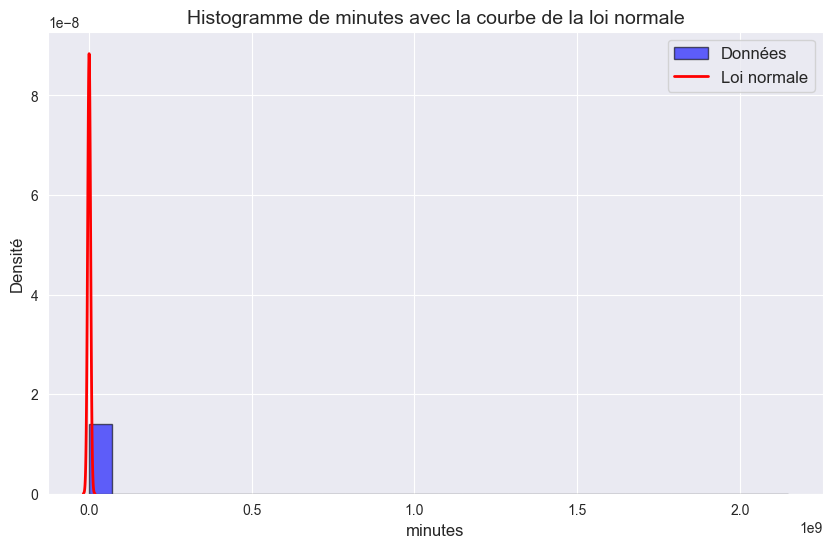

In [59]:
from scipy.stats import skew, norm

# Fonction pour analyser la symétrie, tracer l'histogramme et superposer la loi normale
def analyze_distribution(recipe_nona, column):
    # Calcul de la skewness
    skewness = skew(recipe_nona[column])
    print(f"Skewness de {column} : {skewness:.3f}")
    if abs(skewness) < 0.5:
        print("La distribution semble symétrique.")
    else:
        print("La distribution est asymétrique.")
    
    # Histogramme et loi normale
    plt.figure(figsize=(10, 6))
    
    # Histogrammeh
    plt.hist(recipe_nona[column], bins=30, density=True, alpha=0.6, color='blue', edgecolor='black', label='Données')
    
    # Superposition de la loi normale
    mu, std = np.mean(recipe_nona[column]), np.std(recipe_nona[column])
    x = np.linspace(mu - 4*std, mu + 4*std, 100)
    pdf = norm.pdf(x, mu, std)
    plt.plot(x, pdf, 'red', label='Loi normale', linewidth=2)
    
    # Titres et légendes
    plt.title(f"Histogramme de {column} avec la courbe de la loi normale", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Densité', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Appliquer l'analyse à la variable
analyze_distribution(recipe_nona, 'minutes')


la variable minutes suit une distribution asymétrique, pour retirer les outiliers nous pouvons utiliser MAD

In [60]:
from statsmodels.robust.scale import mad

# Calcul de la médiane et du MAD
median = recipe_nona['minutes'].median()
mad_value = mad(recipe_nona['minutes'])

# Calcul des bornes
lower_bound = median - 1.5 * mad_value
upper_bound = median + 3.0 * mad_value

# Identifier les indices des outliers
outliers_index = recipe_nona.index[
    (recipe_nona['minutes'] < lower_bound) | (recipe_nona['minutes'] > upper_bound)
]

# Supprimer les lignes avec ces indices
recipe_nona = recipe_nona.drop(index=outliers_index)


<Axes: ylabel='minutes'>

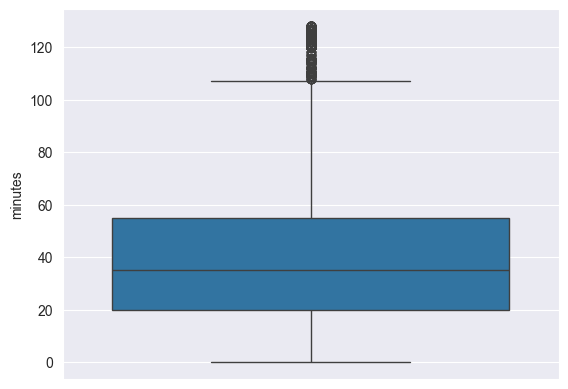

In [61]:
# Boxplot for the continuous variable wo abnormal values 
sns.boxplot(recipe_nona['minutes'])

traitement de la variable minutes :

In [62]:
# la base de données recipe contient une variables nutrition intéressante avec valeurs numériques. Split cette variable peut s'avérer intéressante pour la suite. 

## Nutrition score processing

# Séparation des colonnes nutritionnelles
recipe_nona[['calories', 'total fat (%)', 'sugar (%)', 'sodium (%)', 'protein (%)', 'saturated fat (%)', 'carbohydrates (%)']] = recipe_nona['nutrition'].str.split(",", expand=True)

# Suppression des caractères spéciaux
recipe_nona['calories'] = recipe_nona['calories'].apply(lambda x: x.replace('[', '')) 
recipe_nona['carbohydrates (%)'] = recipe_nona['carbohydrates (%)'].apply(lambda x: x.replace(']', ''))  

# Conversion en float
cols_to_convert = ['calories', 'total fat (%)', 'sugar (%)', 'sodium (%)', 'protein (%)', 'saturated fat (%)', 'carbohydrates (%)']
recipe_nona[cols_to_convert] = recipe_nona[cols_to_convert].astype(float)

# Vérification des types
print(recipe_nona[cols_to_convert].dtypes)



calories             float64
total fat (%)        float64
sugar (%)            float64
sodium (%)           float64
protein (%)          float64
saturated fat (%)    float64
carbohydrates (%)    float64
dtype: object


In [63]:
recipe_nona.describe()

,id,minutes,contributor_id,n_steps,n_ingredients,calories,total fat (PDV%),sugar (PDV%),sodium (PDV%),protein (PDV%),saturated fat (PDV%),carbohydrates (PDV%),total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%)
count,202119.000000,202119.000000,2.021190e+05,202119.000000,202119.000000,202119.000000,202119.000000,202119.000000,202119.000000,202119.000000,202119.000000,202119.000000,202119.000000,202119.000000,202119.000000,202119.000000,202119.000000,202119.000000
mean,227031.277638,39.304974,5.344940e+06,9.547138,8.942084,454.723282,34.783108,81.710220,27.922407,32.172646,43.936711,15.070666,34.783108,81.710220,27.922407,32.172646,43.936711,15.070666
std,139772.676556,26.181110,9.781381e+07,5.644328,3.660858,1213.674283,75.621679,842.811766,103.639609,48.975031,93.263878,85.831577,75.621679,842.811766,103.639609,48.975031,93.263878,85.831577
min,40.000000,0.000000,2.700000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106802.500000,20.000000,5.838200e+04,6.000000,6.000000,170.700000,8.000000,9.000000,5.000000,6.000000,7.000000,4.000000,8.000000,9.000000,5.000000,6.000000,7.000000,4.000000
50%,213707.000000,35.000000,1.828090e+05,8.000000,9.000000,305.500000,20.000000,24.000000,14.000000,17.000000,22.000000,9.000000,20.000000,24.000000,14.000000,17.000000,22.000000,9.000000
75%,338055.500000,55.000000,4.149880e+05,12.000000,11.000000,504.300000,40.000000,66.000000,31.000000,48.000000,51.000000,16.000000,40.000000,66.000000,31.000000,48.000000,51.000000,16.000000
max,537716.000000,128.000000,2.002290e+09,97.000000,43.000000,434360.200000,17183.000000,362729.000000,14664.000000,6552.000000,10395.000000,36098.000000,17183.000000,362729.000000,14664.000000,6552.000000,10395.000000,36098.000000


In [64]:
# Missing values 
print("Total number of missing values:", recipe_nona.isnull().sum().sum())
#print("Same with the na function", recipe_nona.isna().sum())

Total number of missing values: 0


In [65]:
# In details
print("Per variable", recipe_nona.isna().sum())

Per variable name                    0
id                      0
minutes                 0
contributor_id          0
submitted               0
tags                    0
nutrition               0
n_steps                 0
steps                   0
description             0
ingredients             0
n_ingredients           0
calories                0
total fat (PDV%)        0
sugar (PDV%)            0
sodium (PDV%)           0
protein (PDV%)          0
saturated fat (PDV%)    0
carbohydrates (PDV%)    0
total fat (%)           0
sugar (%)               0
sodium (%)              0
protein (%)             0
saturated fat (%)       0
carbohydrates (%)       0
dtype: int64


In [66]:
from scipy.stats import skew

# Liste des colonnes à analyser
cols_to_check = ['calories', 'total fat (%)', 'sugar (%)', 'sodium (%)', 'protein (%)', 'saturated fat (%)', 'carbohydrates (%)']

# Analyse de la skewness (symétrie)
for col in cols_to_check:
    data = recipe_nona[col]  # Pas besoin de dropna() si aucune valeur n'est manquante

    # Calcul de la skewness
    skewness_value = skew(data)
    print(f"Skewness de '{col}' : {skewness_value:.3f}")
    
    # Interprétation de la symétrie
    if abs(skewness_value) < 0.5:
        print(f"'{col}' semble suivre une distribution symétrique (Skewness ≈ 0).")
    elif skewness_value > 0.5:
        print(f"'{col}' est asymétrique à droite (queue à droite).")
    elif skewness_value < -0.5:
        print(f"'{col}' est asymétrique à gauche (queue à gauche).")


Skewness de 'calories' : 231.436
'calories' est asymétrique à droite (queue à droite).
Skewness de 'total fat (%)' : 66.368
'total fat (%)' est asymétrique à droite (queue à droite).
Skewness de 'sugar (%)' : 394.505
'sugar (%)' est asymétrique à droite (queue à droite).
Skewness de 'sodium (%)' : 50.018
'sodium (%)' est asymétrique à droite (queue à droite).
Skewness de 'protein (%)' : 30.494
'protein (%)' est asymétrique à droite (queue à droite).
Skewness de 'saturated fat (%)' : 20.056
'saturated fat (%)' est asymétrique à droite (queue à droite).
Skewness de 'carbohydrates (%)' : 368.267
'carbohydrates (%)' est asymétrique à droite (queue à droite).


les distributions sont asymétriques on retire les outliers en utilisant MAD 

Analyse pour : calories


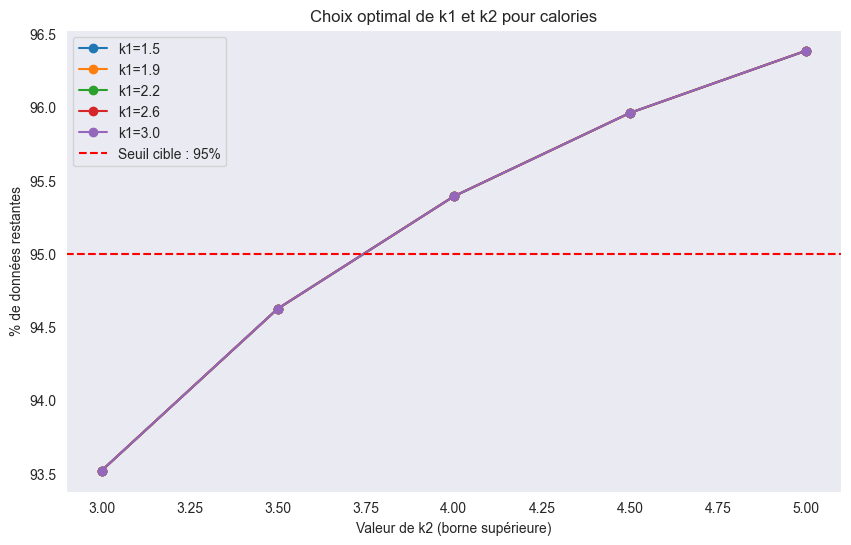

Optimal k1 pour calories: 1.5, Optimal k2: 5.0
       k1   k2  lower_bound  upper_bound  percent_remaining
0   1.500  3.0   -40.094577   996.689154          93.519164
1   1.500  3.5   -40.094577  1111.887347          94.624454
2   1.500  4.0   -40.094577  1227.085539          95.391824
3   1.500  4.5   -40.094577  1342.283731          95.961290
4   1.500  5.0   -40.094577  1457.481924          96.385793
5   1.875  3.0  -126.493221   996.689154          93.519164
6   1.875  3.5  -126.493221  1111.887347          94.624454
7   1.875  4.0  -126.493221  1227.085539          95.391824
8   1.875  4.5  -126.493221  1342.283731          95.961290
9   1.875  5.0  -126.493221  1457.481924          96.385793
10  2.250  3.0  -212.891866   996.689154          93.519164
11  2.250  3.5  -212.891866  1111.887347          94.624454
12  2.250  4.0  -212.891866  1227.085539          95.391824
13  2.250  4.5  -212.891866  1342.283731          95.961290
14  2.250  5.0  -212.891866  1457.481924          96.

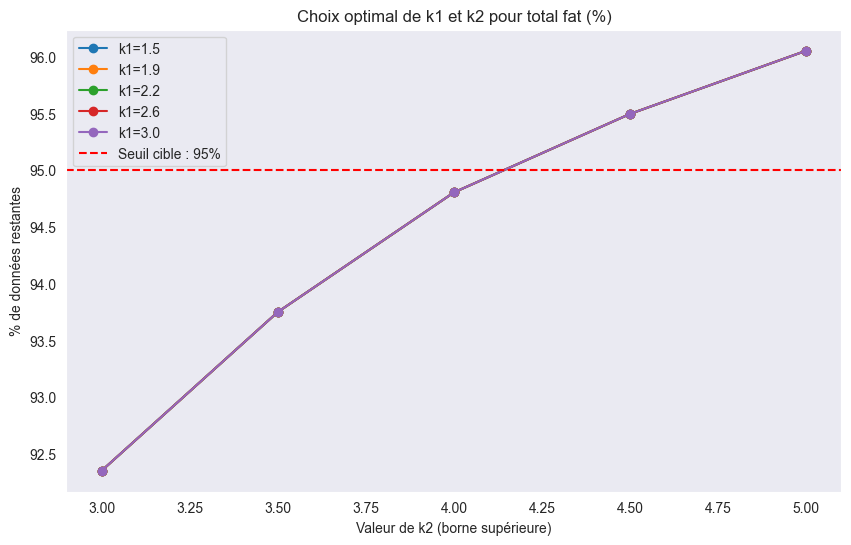

Optimal k1 pour total fat (%): 1.5, Optimal k2: 5.0
       k1   k2  lower_bound  upper_bound  percent_remaining
0   1.500  3.0   -11.134647    82.269293          92.353020
1   1.500  3.5   -11.134647    92.647509          93.750711
2   1.500  4.0   -11.134647   103.025724          94.804051
3   1.500  4.5   -11.134647   113.403940          95.495723
4   1.500  5.0   -11.134647   123.782155          96.052326
5   1.875  3.0   -18.918308    82.269293          92.353020
6   1.875  3.5   -18.918308    92.647509          93.750711
7   1.875  4.0   -18.918308   103.025724          94.804051
8   1.875  4.5   -18.918308   113.403940          95.495723
9   1.875  5.0   -18.918308   123.782155          96.052326
10  2.250  3.0   -26.701970    82.269293          92.353020
11  2.250  3.5   -26.701970    92.647509          93.750711
12  2.250  4.0   -26.701970   103.025724          94.804051
13  2.250  4.5   -26.701970   113.403940          95.495723
14  2.250  5.0   -26.701970   123.782155        

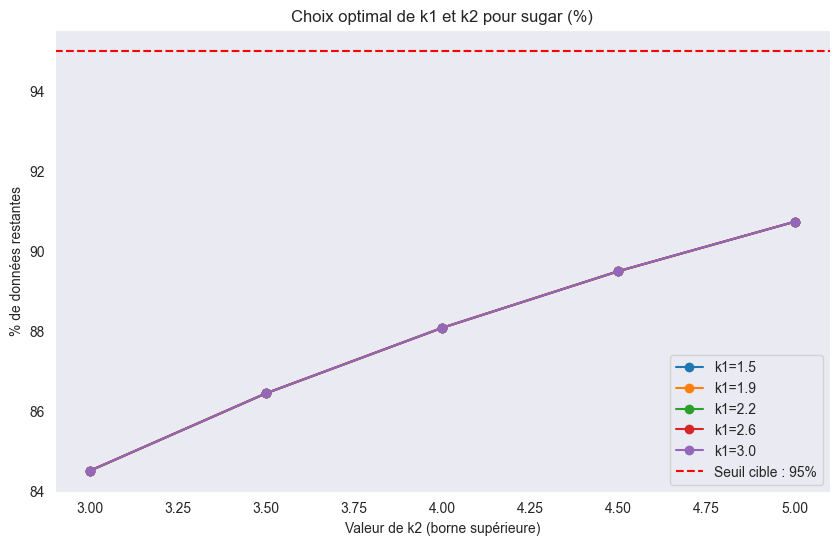

Optimal k1 pour sugar (%): None, Optimal k2: None
       k1   k2  lower_bound  upper_bound  percent_remaining
0   1.500  3.0   -18.254163   108.508326          84.496757
1   1.500  3.5   -18.254163   122.593048          86.433735
2   1.500  4.0   -18.254163   136.677769          88.070889
3   1.500  4.5   -18.254163   150.762490          89.486392
4   1.500  5.0   -18.254163   164.847211          90.722792
5   1.875  3.0   -28.817704   108.508326          84.496757
6   1.875  3.5   -28.817704   122.593048          86.433735
7   1.875  4.0   -28.817704   136.677769          88.070889
8   1.875  4.5   -28.817704   150.762490          89.486392
9   1.875  5.0   -28.817704   164.847211          90.722792
10  2.250  3.0   -39.381245   108.508326          84.496757
11  2.250  3.5   -39.381245   122.593048          86.433735
12  2.250  4.0   -39.381245   136.677769          88.070889
13  2.250  4.5   -39.381245   150.762490          89.486392
14  2.250  5.0   -39.381245   164.847211          

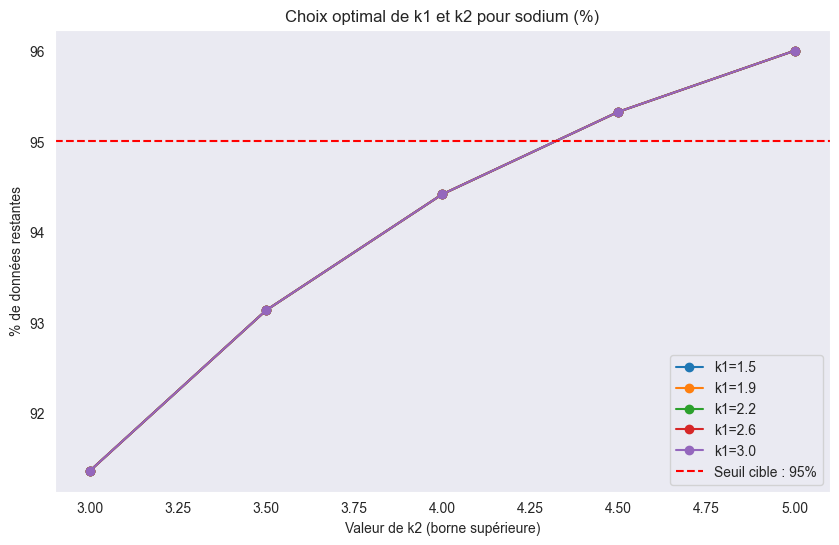

Optimal k1 pour sodium (%): 1.5, Optimal k2: 5.0
       k1   k2  lower_bound  upper_bound  percent_remaining
0   1.500  3.0   -10.462937    62.925873          91.362514
1   1.500  3.5   -10.462937    71.080185          93.134737
2   1.500  4.0   -10.462937    79.234498          94.416656
3   1.500  4.5   -10.462937    87.388810          95.327010
4   1.500  5.0   -10.462937    95.543122          96.001860
5   1.875  3.0   -16.578671    62.925873          91.362514
6   1.875  3.5   -16.578671    71.080185          93.134737
7   1.875  4.0   -16.578671    79.234498          94.416656
8   1.875  4.5   -16.578671    87.388810          95.327010
9   1.875  5.0   -16.578671    95.543122          96.001860
10  2.250  3.0   -22.694405    62.925873          91.362514
11  2.250  3.5   -22.694405    71.080185          93.134737
12  2.250  4.0   -22.694405    79.234498          94.416656
13  2.250  4.5   -22.694405    87.388810          95.327010
14  2.250  5.0   -22.694405    95.543122          9

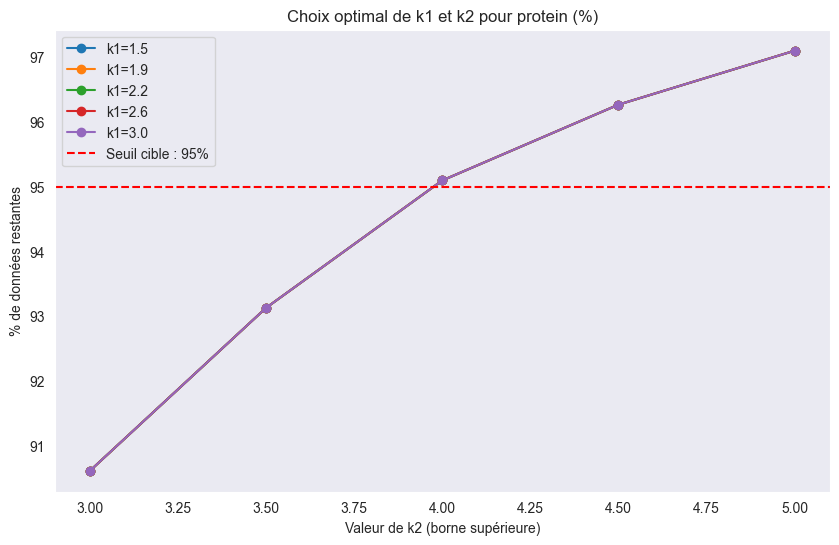

Optimal k1 pour protein (%): 1.5, Optimal k2: 5.0
       k1   k2  lower_bound  upper_bound  percent_remaining
0   1.500  3.0   -14.134647    79.269293          90.611966
1   1.500  3.5   -14.134647    89.647509          93.127811
2   1.500  4.0   -14.134647   100.025724          95.094474
3   1.500  4.5   -14.134647   110.403940          96.264577
4   1.500  5.0   -14.134647   120.782155          97.097749
5   1.875  3.0   -21.918308    79.269293          90.611966
6   1.875  3.5   -21.918308    89.647509          93.127811
7   1.875  4.0   -21.918308   100.025724          95.094474
8   1.875  4.5   -21.918308   110.403940          96.264577
9   1.875  5.0   -21.918308   120.782155          97.097749
10  2.250  3.0   -29.701970    79.269293          90.611966
11  2.250  3.5   -29.701970    89.647509          93.127811
12  2.250  4.0   -29.701970   100.025724          95.094474
13  2.250  4.5   -29.701970   110.403940          96.264577
14  2.250  5.0   -29.701970   120.782155          

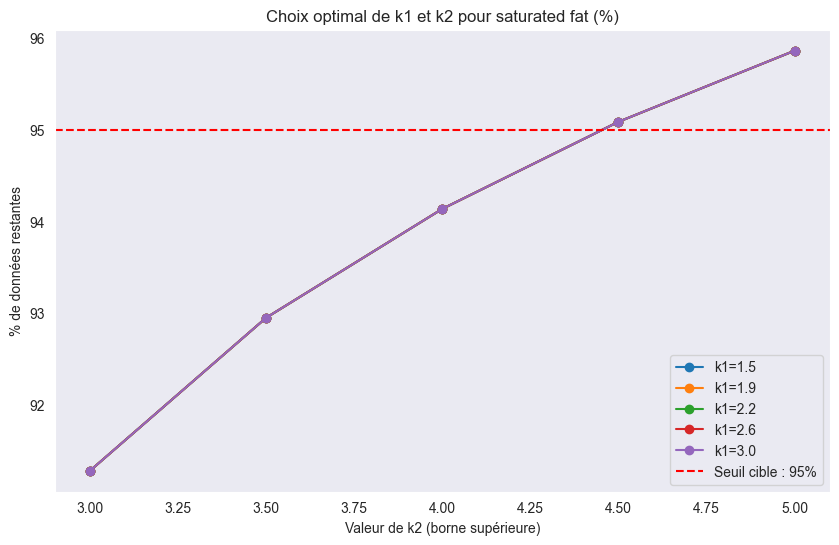

Optimal k1 pour saturated fat (%): 1.5, Optimal k2: 5.0
       k1   k2  lower_bound  upper_bound  percent_remaining
0   1.500  3.0   -18.030260    102.06052          91.280384
1   1.500  3.5   -18.030260    115.40394          92.949203
2   1.500  4.0   -18.030260    128.74736          94.137117
3   1.500  4.5   -18.030260    142.09078          95.087053
4   1.500  5.0   -18.030260    155.43420          95.862833
5   1.875  3.0   -28.037825    102.06052          91.280384
6   1.875  3.5   -28.037825    115.40394          92.949203
7   1.875  4.0   -28.037825    128.74736          94.137117
8   1.875  4.5   -28.037825    142.09078          95.087053
9   1.875  5.0   -28.037825    155.43420          95.862833
10  2.250  3.0   -38.045390    102.06052          91.280384
11  2.250  3.5   -38.045390    115.40394          92.949203
12  2.250  4.0   -38.045390    128.74736          94.137117
13  2.250  4.5   -38.045390    142.09078          95.087053
14  2.250  5.0   -38.045390    155.43420    

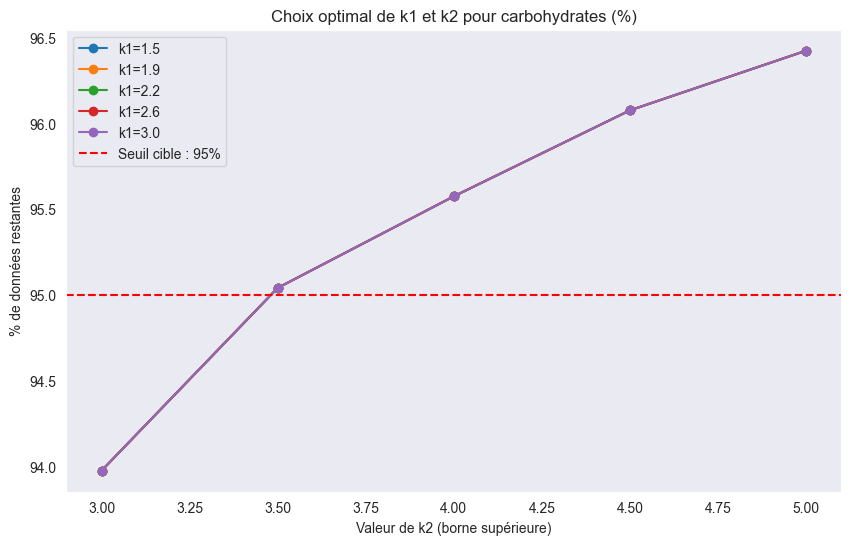

Optimal k1 pour carbohydrates (%): 1.5, Optimal k2: 5.0
       k1   k2  lower_bound  upper_bound  percent_remaining
0   1.500  3.0    -4.343420    35.686840          93.974837
1   1.500  3.5    -4.343420    40.134647          95.041040
2   1.500  4.0    -4.343420    44.582453          95.575379
3   1.500  4.5    -4.343420    49.030260          96.077064
4   1.500  5.0    -4.343420    53.478067          96.424878
5   1.875  3.0    -7.679275    35.686840          93.974837
6   1.875  3.5    -7.679275    40.134647          95.041040
7   1.875  4.0    -7.679275    44.582453          95.575379
8   1.875  4.5    -7.679275    49.030260          96.077064
9   1.875  5.0    -7.679275    53.478067          96.424878
10  2.250  3.0   -11.015130    35.686840          93.974837
11  2.250  3.5   -11.015130    40.134647          95.041040
12  2.250  4.0   -11.015130    44.582453          95.575379
13  2.250  4.5   -11.015130    49.030260          96.077064
14  2.250  5.0   -11.015130    53.478067    

In [67]:
from statsmodels.robust.scale import mad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Liste des colonnes à analyser
cols_to_check = ['calories', 'total fat (%)', 'sugar (%)', 'sodium (%)', 'protein (%)', 'saturated fat (%)', 'carbohydrates (%)']

# Fonction pour tester différentes combinaisons de k1 et k2
def find_optimal_k1_k2(data, col, k1_values, k2_values, target_percent=95):
    median = data[col].median()
    mad_value = mad(data[col])
    optimal_k1, optimal_k2 = None, None
    optimal_percent = 0
    
    results = []
    
    for k1 in k1_values:
        for k2 in k2_values:
            # Calcul des bornes
            lower_bound = median - k1 * mad_value
            upper_bound = median + k2 * mad_value
            
            # Filtrer les données
            filtered_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
            percent_remaining = len(filtered_data) / len(data) * 100
            
            # Stocker les résultats
            results.append({
                'k1': k1,
                'k2': k2,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'percent_remaining': percent_remaining
            })
            
            # Mise à jour des k1 et k2 optimaux
            if percent_remaining >= target_percent and percent_remaining > optimal_percent:
                optimal_k1, optimal_k2 = k1, k2
                optimal_percent = percent_remaining
    
    return pd.DataFrame(results), optimal_k1, optimal_k2

# Tester pour toutes les colonnes
k1_values = np.linspace(1.5, 3, 5)  # Tester k1 entre 1.5 et 3
k2_values = np.linspace(3, 5, 5)   # Tester k2 entre 3 et 5
target_percent = 95  # Seuil cible pour le pourcentage de données conservées

optimal_k_values = {}

# Appliquer le calcul pour toutes les colonnes
for col in cols_to_check:
    print(f"Analyse pour : {col}")
    results, optimal_k1, optimal_k2 = find_optimal_k1_k2(recipe_nona, col, k1_values, k2_values, target_percent)
    
    # Stocker les k1 et k2 optimaux pour chaque colonne
    optimal_k_values[col] = {'k1': optimal_k1, 'k2': optimal_k2}
    
    # Afficher les résultats pour cette colonne
    plt.figure(figsize=(10, 6))
    for k1 in k1_values:
        subset = results[results['k1'] == k1]
        plt.plot(subset['k2'], subset['percent_remaining'], marker='o', label=f'k1={k1:.1f}')
    plt.axhline(y=target_percent, color='r', linestyle='--', label=f'Seuil cible : {target_percent}%')
    plt.title(f"Choix optimal de k1 et k2 pour {col}")
    plt.xlabel("Valeur de k2 (borne supérieure)")
    plt.ylabel("% de données restantes")
    plt.legend()
    plt.grid()
    plt.show()
    
    print(f"Optimal k1 pour {col}: {optimal_k1}, Optimal k2: {optimal_k2}")
    print(results)

# Résumé des k1 et k2 optimaux
print("\nRésumé des k1 et k2 optimaux :")
for col, k_values in optimal_k_values.items():
    print(f"{col}: k1={k_values['k1']}, k2={k_values['k2']}")



In [68]:
recipe_cleaned = recipe_nona.copy()

In [69]:
recipe_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202119 entries, 0 to 231636
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   name                  202119 non-null  object 
 1   id                    202119 non-null  int64  
 2   minutes               202119 non-null  int64  
 3   contributor_id        202119 non-null  int64  
 4   submitted             202119 non-null  object 
 5   tags                  202119 non-null  object 
 6   nutrition             202119 non-null  object 
 7   n_steps               202119 non-null  int64  
 8   steps                 202119 non-null  object 
 9   description           202119 non-null  object 
 10  ingredients           202119 non-null  object 
 11  n_ingredients         202119 non-null  int64  
 12  calories              202119 non-null  float64
 13  total fat (PDV%)      202119 non-null  float64
 14  sugar (PDV%)          202119 non-null  float64
 15  sodiu

In [70]:
print(recipe_cleaned[cols_to_check].dtypes)


calories             float64
total fat (%)        float64
sugar (%)            float64
sodium (%)           float64
protein (%)          float64
saturated fat (%)    float64
carbohydrates (%)    float64
dtype: object


In [71]:
from statsmodels.robust.scale import mad
import pandas as pd
import numpy as np

# Appliquer la méthode MAD pour chaque colonne avec les k1 et k2 optimaux
recipe_cleaned = recipe_nona.copy()

# Paramètres par défaut pour k1 et k2
default_k1 = 1.5
default_k2 = 3.0

# Boucle sur les colonnes pour appliquer le nettoyage
for col in cols_to_check:
    # Récupérer les k1 et k2 optimaux pour chaque colonne
    k1 = optimal_k_values[col]['k1']
    k2 = optimal_k_values[col]['k2']
    
    # Vérifier si k1 ou k2 est None, appliquer les valeurs par défaut
    if k1 is None or k2 is None:
        print(f"Les valeurs optimales de k1 et k2 pour '{col}' n'ont pas été trouvées. Utilisation des valeurs par défaut.")
        k1 = default_k1
        k2 = default_k2

    # Vérifier les données avant de calculer le MAD
    data = recipe_cleaned[col].dropna()  # Exclure les NaN
    if data.empty or len(data.unique()) <= 1:
        print(f"Impossible de calculer la MAD pour '{col}' : colonne vide ou valeurs constantes.")
        continue  # Passer à la prochaine colonne dans la boucle
    
    # Calcul de la médiane et du MAD
    median = data.median()
    mad_value = mad(data)
    
    # Vérifier le MAD
    if mad_value is None or mad_value == 0:
        print(f"MAD non calculable ou nulle pour '{col}'. Colonne ignorée.")
        continue  # Passer à la prochaine colonne dans la boucle

    # Calcul des bornes
    lower_bound = median - k1 * mad_value
    upper_bound = median + k2 * mad_value

    # Filtrer les données pour enlever les outliers
    recipe_cleaned = recipe_cleaned[(recipe_cleaned[col] >= lower_bound) & (recipe_cleaned[col] <= upper_bound)]
    
    # Afficher les résultats
    print(f"\nAprès suppression des outliers pour {col}:")
    print(f"Borne inférieure : {lower_bound}, Borne supérieure : {upper_bound}")
    print(f"Nombre de lignes restantes : {len(recipe_cleaned)}")

# Résumé final
print("\nNombre total de lignes après suppression des outliers :")
print(len(recipe_cleaned))




Après suppression des outliers pour calories:
Borne inférieure : -40.094577133655775, Borne supérieure : 1457.4819237788524
Nombre de lignes restantes : 194814

Après suppression des outliers pour total fat (%):
Borne inférieure : -9.910743260859238, Borne supérieure : 115.36914420286413
Nombre de lignes restantes : 191779
Les valeurs optimales de k1 et k2 pour 'sugar (%)' n'ont pas été trouvées. Utilisation des valeurs par défaut.

Après suppression des outliers pour sugar (%):
Borne inférieure : -17.030259899651256, Borne supérieure : 103.06051979930251
Nombre de lignes restantes : 164488

Après suppression des outliers pour sodium (%):
Borne inférieure : -10.462936605342428, Borne supérieure : 95.5431220178081
Nombre de lignes restantes : 161179

Après suppression des outliers pour protein (%):
Borne inférieure : -14.134646588617642, Borne supérieure : 120.78215529539213
Nombre de lignes restantes : 158992

Après suppression des outliers pour saturated fat (%):
Borne inférieure : -

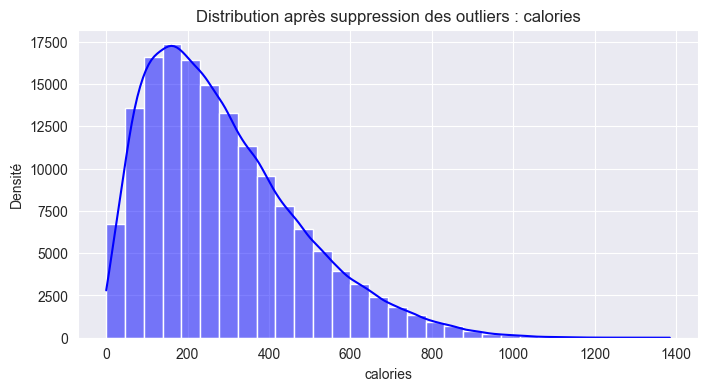

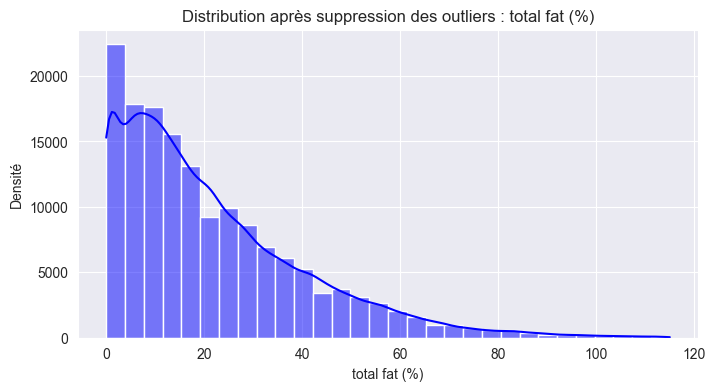

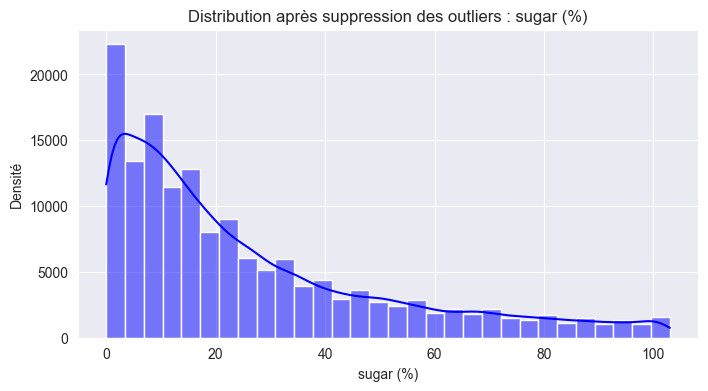

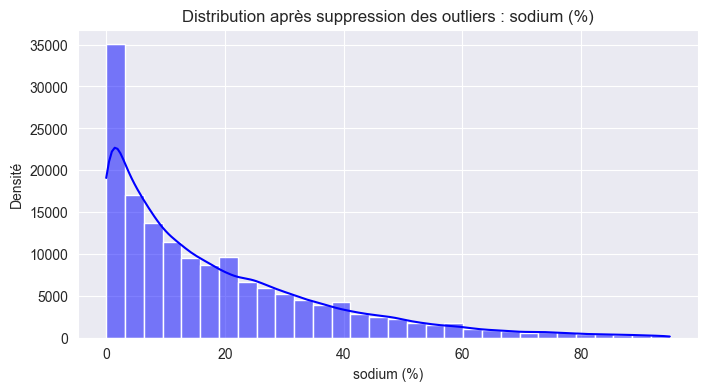

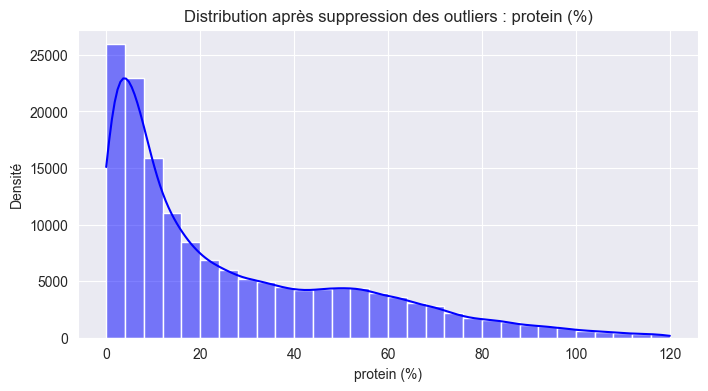

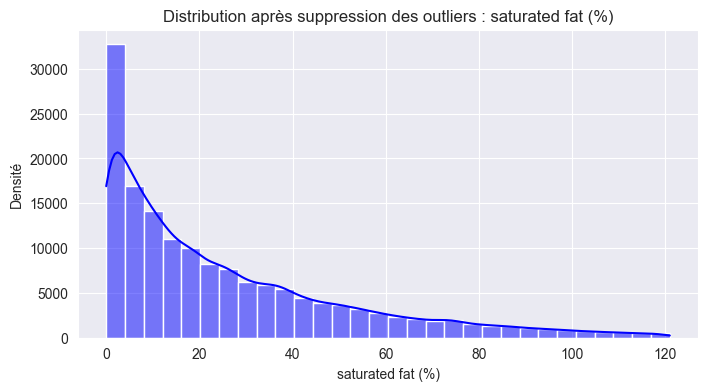

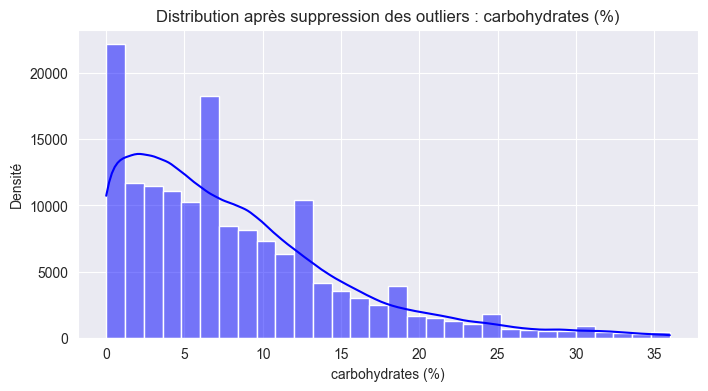

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boucle pour tracer des histogrammes des données nettoyées
for col in cols_to_check:
    plt.figure(figsize=(8, 4))
    sns.histplot(recipe_cleaned[col].dropna(), bins=30, kde=True, color='blue')
    plt.title(f"Distribution après suppression des outliers : {col}")
    plt.xlabel(col)
    plt.ylabel("Densité")
    plt.show()


In [73]:
recipe_cleaned.describe()

,id,minutes,contributor_id,n_steps,n_ingredients,calories,total fat (PDV%),sugar (PDV%),sodium (PDV%),protein (PDV%),saturated fat (PDV%),carbohydrates (PDV%),total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%)
count,154356.000000,154356.000000,1.543560e+05,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000
mean,230426.844625,37.854933,5.297779e+06,9.310548,8.913246,287.430537,21.643467,26.236667,18.513138,26.647782,26.102464,8.188901,21.643467,26.236667,18.513138,26.647782,26.102464,8.188901
std,139322.059064,25.113150,9.723147e+07,5.337820,3.599669,188.195556,19.174804,25.218488,18.656338,26.480563,26.241471,6.917826,19.174804,25.218488,18.656338,26.480563,26.241471,6.917826
min,45.000000,0.000000,2.700000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110966.750000,20.000000,6.012400e+04,6.000000,6.000000,143.000000,7.000000,7.000000,4.000000,6.000000,6.000000,3.000000,7.000000,7.000000,4.000000,6.000000,6.000000,3.000000
50%,218927.500000,31.000000,1.944690e+05,8.000000,9.000000,250.500000,17.000000,18.000000,13.000000,16.000000,18.000000,7.000000,17.000000,18.000000,13.000000,16.000000,18.000000,7.000000
75%,341599.000000,50.000000,4.230760e+05,12.000000,11.000000,395.100000,31.000000,38.000000,28.000000,43.000000,39.000000,12.000000,31.000000,38.000000,28.000000,43.000000,39.000000,12.000000
max,537716.000000,128.000000,2.002285e+09,86.000000,43.000000,1384.900000,115.000000,103.000000,95.000000,120.000000,121.000000,36.000000,115.000000,103.000000,95.000000,120.000000,121.000000,36.000000


Preprocessing base de données interactions 

In [74]:
interactions = pd.read_csv("C:/Users/awand/Downloads/RAW_interactions.csv/RAW_interactions.csv")
interactions.head(3)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...


In [75]:
interactions.describe()

,user_id,recipe_id,rating
count,1.132367e+06,1.132367e+06,1.132367e+06
mean,1.384291e+08,1.608972e+05,4.411016e+00
std,5.014269e+08,1.303987e+05,1.264752e+00
min,1.533000e+03,3.800000e+01,0.000000e+00
25%,1.354700e+05,5.425700e+04,4.000000e+00
50%,3.309370e+05,1.205470e+05,5.000000e+00
75%,8.045500e+05,2.438520e+05,5.000000e+00
max,2.002373e+09,5.377160e+05,5.000000e+00


In [76]:
import pandas as pd

# Exemple : votre table interactions contient les colonnes 'recipe_id' et 'rating'

# Calculer la note moyenne pour chaque recipe_id
recipe_avg_ratings = interactions.groupby('recipe_id')['rating'].mean().reset_index()
recipe_avg_ratings.rename(columns={'rating': 'avg_rating'}, inplace=True)

# Ajouter la colonne des notes moyennes à la table interactions
interactions = interactions.merge(recipe_avg_ratings, on='recipe_id', how='left')

# Afficher un aperçu de la table
print(interactions.head())


   user_id  recipe_id        date  rating  \
0    38094      40893  2003-02-17       4   
1  1293707      40893  2011-12-21       5   
2     8937      44394  2002-12-01       4   
3   126440      85009  2010-02-27       5   
4    57222      85009  2011-10-01       5   

                                              review  avg_rating  
0  Great with a salad. Cooked on top of stove for...         4.5  
1  So simple, so delicious! Great for chilly fall...         4.5  
2  This worked very well and is EASY.  I used not...         4.0  
3  I made the Mexican topping and took it to bunk...         5.0  
4  Made the cheddar bacon topping, adding a sprin...         5.0  


MERGE DES DEUX DATAFRAMES 


In [77]:
# Fusionner les deux DataFrames sur les colonnes 'recipe_id' et 'id'
merged_df = interactions.merge(recipe_cleaned, left_on='recipe_id', right_on='id', how='inner')

# Afficher un aperçu du DataFrame fusionné
print(merged_df.head())


   user_id  recipe_id        date  rating  \
0    76535     134728  2005-09-02       4   
1   273745     134728  2005-12-22       5   
2   353911     134728  2006-09-26       5   
3   190375     134728  2007-03-09       5   
4   468945     134728  2008-02-20       0   

                                              review  avg_rating  \
0                                         Very good!    4.142857   
1                             Better than the real!!    4.142857   
2  Absolutely AWESOME! I was speechless when I tr...    4.142857   
3  These taste absolutely wonderful!!  My son-in-...    4.142857   
4  Made my own buttermilk w/ vinegar and milk.  U...    4.142857   

                   name      id  minutes  contributor_id  ... sodium (PDV%)  \
0  kfc honey bbq strips  134728       40          166019  ...          37.0   
1  kfc honey bbq strips  134728       40          166019  ...          37.0   
2  kfc honey bbq strips  134728       40          166019  ...          37.0   
3  k

In [78]:
print(recipe_cleaned.shape)
print(interactions.shape)
print(merged_df.shape)

(154356, 25)
(1132367, 6)
(751492, 31)


études des liens entre variables 

                       user_id  recipe_id    rating  avg_rating        id  \
user_id               1.000000   0.083179 -0.188362   -0.155450  0.083179   
recipe_id             0.083179   1.000000 -0.005953   -0.011832  1.000000   
rating               -0.188362  -0.005953  1.000000    0.503141 -0.005953   
avg_rating           -0.155450  -0.011832  0.503141    1.000000 -0.011832   
id                    0.083179   1.000000 -0.005953   -0.011832  1.000000   
minutes               0.021842  -0.066236 -0.019463   -0.038682 -0.066236   
contributor_id        0.104999   0.100603 -0.007722   -0.015347  0.100603   
n_steps               0.040255   0.052154 -0.017018   -0.033823  0.052154   
n_ingredients         0.002607   0.015543  0.000630    0.001252  0.015543   
calories              0.005468  -0.008722  0.001282    0.002547 -0.008722   
total fat (PDV%)      0.003744  -0.001657  0.011137    0.022134 -0.001657   
sugar (PDV%)          0.030408  -0.033437 -0.006736   -0.013387 -0.033437   

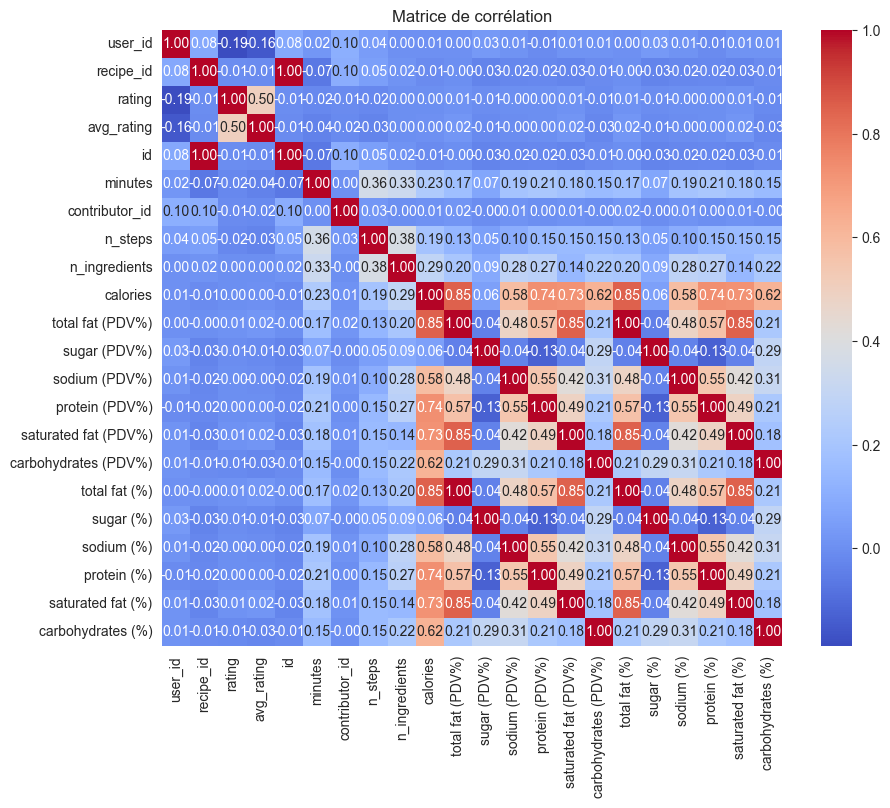

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner uniquement les colonnes numériques
numeric_columns = merged_df.select_dtypes(include=['number'])

# Calculer la matrice de corrélation
correlation_matrix = numeric_columns.corr()

# Afficher la matrice de corrélation
print(correlation_matrix)

# Tracer la matrice de corrélation avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Matrice de corrélation")
plt.show()


In [80]:
merged_df.head()

,user_id,recipe_id,date,rating,review,avg_rating,name,id,minutes,contributor_id,...,sodium (PDV%),protein (PDV%),saturated fat (PDV%),carbohydrates (PDV%),total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%)
0,76535,134728,2005-09-02,4,Very good!,4.142857,kfc honey bbq strips,134728,40,166019,...,37.0,78.0,4.0,10.0,4.0,40.0,37.0,78.0,4.0,10.0
1,273745,134728,2005-12-22,5,Better than the real!!,4.142857,kfc honey bbq strips,134728,40,166019,...,37.0,78.0,4.0,10.0,4.0,40.0,37.0,78.0,4.0,10.0
2,353911,134728,2006-09-26,5,Absolutely AWESOME! I was speechless when I tr...,4.142857,kfc honey bbq strips,134728,40,166019,...,37.0,78.0,4.0,10.0,4.0,40.0,37.0,78.0,4.0,10.0
3,190375,134728,2007-03-09,5,These taste absolutely wonderful!! My son-in-...,4.142857,kfc honey bbq strips,134728,40,166019,...,37.0,78.0,4.0,10.0,4.0,40.0,37.0,78.0,4.0,10.0
4,468945,134728,2008-02-20,0,Made my own buttermilk w/ vinegar and milk. U...,4.142857,kfc honey bbq strips,134728,40,166019,...,37.0,78.0,4.0,10.0,4.0,40.0,37.0,78.0,4.0,10.0


In [81]:
# Afficher toutes les colonnes de ton DataFrame
print("Liste des colonnes dans le DataFrame :")
print(merged_df.columns.tolist())


Liste des colonnes dans le DataFrame :
['user_id', 'recipe_id', 'date', 'rating', 'review', 'avg_rating', 'name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags', 'nutrition', 'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients', 'calories', 'total fat (PDV%)', 'sugar (PDV%)', 'sodium (PDV%)', 'protein (PDV%)', 'saturated fat (PDV%)', 'carbohydrates (PDV%)', 'total fat (%)', 'sugar (%)', 'sodium (%)', 'protein (%)', 'saturated fat (%)', 'carbohydrates (%)']


In [82]:
# Vérifier les valeurs manquantes
missing_values = merged_df.isnull().sum()

# Afficher uniquement les colonnes avec des valeurs manquantes
print("\nColonnes avec des valeurs manquantes :")
print(missing_values[missing_values > 0])



Colonnes avec des valeurs manquantes :
review    101
dtype: int64


In [83]:
# Supprimer les lignes où la colonne 'review' contient des valeurs manquantes
merged_df = merged_df.dropna(subset=["review"])

# Vérifier après suppression
print(f"\nNombre de lignes restantes : {len(merged_df)}")



Nombre de lignes restantes : 751391


In [84]:
# Identifier les colonnes à supprimer
columns_to_remove = [col for col in merged_df.columns if "(%)" in col and "(PDV%)" not in col]

# Supprimer les colonnes sélectionnées
merged_df = merged_df.drop(columns=columns_to_remove)

# Afficher le DataFrame après suppression
print("\nColonnes restantes après suppression :")
print(merged_df.columns)



Colonnes restantes après suppression :
Index(['user_id', 'recipe_id', 'date', 'rating', 'review', 'avg_rating',
       'name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'calories', 'total fat (PDV%)', 'sugar (PDV%)',
       'sodium (PDV%)', 'protein (PDV%)', 'saturated fat (PDV%)',
       'carbohydrates (PDV%)'],
      dtype='object')


In [86]:
# Compter le nombre de commentaires par recipe_id
comments_per_recipe = merged_df.groupby("recipe_id")["review"].count().reset_index()

# Renommer la colonne pour plus de clarté
comments_per_recipe.columns = ["recipe_id", "number_of_comments"]

# Afficher un aperçu du résultat
print("\nNombre de commentaires par recipe_id :")
print(comments_per_recipe.head(100))



Nombre de commentaires par recipe_id :
    recipe_id  number_of_comments
0          45                   3
1          46                   2
2          49                  20
3          59                   4
4          62                  22
..        ...                 ...
95        493                   1
96        498                   9
97        506                  16
98        507                   1
99        512                  10

[100 rows x 2 columns]


les recettes ont plusieurs commentaires, par étape : pour analyser qualité d'une recette, faire un score pour chaque recette en fonction du nombre de commentaires positifs ou négatifs 

In [87]:
from textblob import TextBlob

# Fonction pour classifier les commentaires
def classify_review_auto(review):
    if pd.isnull(review):
        return "Neutral"
    sentiment_score = TextBlob(review).sentiment.polarity  # Calcule un score de polarité
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"

# Appliquer la classification aux commentaires
merged_df["review_classification"] = merged_df["review"].apply(classify_review_auto)

# Afficher un aperçu
print(merged_df[["review", "review_classification"]].head())


                                              review review_classification
0                                         Very good!              Positive
1                             Better than the real!!              Positive
2  Absolutely AWESOME! I was speechless when I tr...              Positive
3  These taste absolutely wonderful!!  My son-in-...              Positive
4  Made my own buttermilk w/ vinegar and milk.  U...              Positive


In [89]:
print(merged_df.columns)

Index(['user_id', 'recipe_id', 'date', 'rating', 'review', 'avg_rating',
       'name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'calories', 'total fat (PDV%)', 'sugar (PDV%)',
       'sodium (PDV%)', 'protein (PDV%)', 'saturated fat (PDV%)',
       'carbohydrates (PDV%)', 'review_classification'],
      dtype='object')


In [90]:
# Vérifier les modalités de la variable 'review_classification'
modalities = merged_df["review_classification"].value_counts()

# Afficher les modalités et leur fréquence
print("\nModalités de 'review_classification' et leur fréquence :")
print(modalities)



Modalités de 'review_classification' et leur fréquence :
review_classification
Positive    704378
Negative     32333
Neutral      14680
Name: count, dtype: int64


In [92]:
# Calculer la proportion des classifications par recipe_id
review_summary = merged_df.groupby("recipe_id")["review_classification"].value_counts(normalize=True).unstack(fill_value=0)

# Renommer les colonnes pour plus de clarté
review_summary.columns = ["Negative_proportion", "Neutral_proportion", "Positive_proportion"]

# Réinitialiser l'index pour fusionner avec le DataFrame principal
review_summary.reset_index(inplace=True)

# Afficher un aperçu
print("\nRésumé des proportions de classifications par recette :")
print(review_summary.head(100))



Résumé des proportions de classifications par recette :
    recipe_id  Negative_proportion  Neutral_proportion  Positive_proportion
0          45             0.333333            0.000000             0.666667
1          46             0.000000            0.000000             1.000000
2          49             0.100000            0.050000             0.850000
3          59             0.000000            0.000000             1.000000
4          62             0.045455            0.000000             0.954545
..        ...                  ...                 ...                  ...
95        493             0.000000            0.000000             1.000000
96        498             0.000000            0.111111             0.888889
97        506             0.062500            0.062500             0.875000
98        507             0.000000            0.000000             1.000000
99        512             0.000000            0.000000             1.000000

[100 rows x 4 columns]


In [93]:
# Fusionner avec le DataFrame principal
merged_df = pd.merge(merged_df, review_summary, on="recipe_id", how="left")

# Afficher un aperçu après fusion
print("\nDataFrame avec proportions de classifications ajoutées :")
print(merged_df.head())



DataFrame avec proportions de classifications ajoutées :
   user_id  recipe_id        date  rating  \
0    76535     134728  2005-09-02       4   
1   273745     134728  2005-12-22       5   
2   353911     134728  2006-09-26       5   
3   190375     134728  2007-03-09       5   
4   468945     134728  2008-02-20       0   

                                              review  avg_rating  \
0                                         Very good!    4.142857   
1                             Better than the real!!    4.142857   
2  Absolutely AWESOME! I was speechless when I tr...    4.142857   
3  These taste absolutely wonderful!!  My son-in-...    4.142857   
4  Made my own buttermilk w/ vinegar and milk.  U...    4.142857   

                   name      id  minutes  contributor_id  ...  \
0  kfc honey bbq strips  134728       40          166019  ...   
1  kfc honey bbq strips  134728       40          166019  ...   
2  kfc honey bbq strips  134728       40          166019  ...   
3 

In [96]:
# Garder une seule ligne par recipe_id
unique_recipes_df = merged_df.drop_duplicates(subset=["recipe_id"], keep="first")

# Afficher un aperçu
print("\nDataFrame avec recipe_id uniques :")
print(unique_recipes_df.head())



DataFrame avec recipe_id uniques :
    user_id  recipe_id        date  rating  \
0     76535     134728  2005-09-02       4   
7    136726     197160  2006-11-25       5   
8    202555     225241  2007-06-20       5   
14   483827     306785  2008-07-15       5   
15    56680      79222  2006-11-11       5   

                                               review  avg_rating  \
0                                          Very good!    4.142857   
7   I used this mix to make meat balls.Very simple...    5.000000   
8   My husband has just found out that he had to c...    3.666667   
14  Being a  huge fan of America's Test Kitchen  I...    5.000000   
15  Oh, This was wonderful!  Had a soup and salad ...    3.960000   

                                 name      id  minutes  contributor_id  ...  \
0                kfc honey bbq strips  134728       40          166019  ...   
7                        mexican hots  197160       20          215057  ...   
8   chicken tamale pie for 2  ww co

In [98]:
# Afficher les dimensions du DataFrame
print(f"Dimensions du DataFrame : {unique_recipes_df.shape}")


Dimensions du DataFrame : (154351, 29)


In [95]:
from collections import Counter

# Combiner tous les tags
all_tags = " ".join(merged_df["tags"].dropna().tolist()).split(", ")

# Compter la fréquence des mots
tag_counts = Counter(all_tags)

# Afficher les 20 mots les plus fréquents
print("\nLes mots les plus fréquents dans les tags :")
print(tag_counts.most_common(3000))



Les mots les plus fréquents dans les tags :
[("'preparation'", 749097), ("'course'", 714149), ("'time-to-make'", 671969), ("'dietary'", 591514), ("'main-ingredient'", 586485), ("'easy'", 437939), ("'occasion'", 405733), ("'cuisine'", 325252), ("'low-in-something'", 267434), ("'main-dish'", 256131), ("'vegetables'", 205591), ("'equipment'", 205567), ("'north-american'", 186765), ("'taste-mood'", 186641), ("'meat'", 183777), ("'low-carb'", 165358), ("'oven'", 163823), ("'low-calorie'", 140071), ("'beginner-cook'", 138150), ("'vegetarian'", 134796), ("'inexpensive'", 131981), ("'dinner-party'", 131087), ("'low-cholesterol'", 130706), ("'low-sodium'", 125819), ("'healthy'", 125162), ("'holiday-event'", 124479), ("'american'", 122773), ("'eggs-dairy'", 120833), ("'kid-friendly'", 120409), ("'5-ingredients-or-less'", 119889), ("'side-dishes'", 116798), ("'comfort-food'", 116623), ("'low-saturated-fat'", 109876), ("'stove-top'", 105330), ("'low-protein'", 102129), ("'pasta-rice-and-grains'",

In [101]:
# Fonction de classification végétarienne
def classify_veggie(tags):
    tags_list = tags.lower().split(",")  # Séparer les tags
    if any(tag in tags_list for tag in ["vegetarian", "vegan", "vegetables"]):
        return "Veggie"
    elif any(tag in tags_list for tag in ["meat", "chicken", "beef", "pork", "seafood"]):
        return "Non-Veggie"
    else:
        return "Unknown"

# Créer une copie explicite du DataFrame si nécessaire pour éviter les problèmes de vue
unique_recipes_df = unique_recipes_df.copy()

# Appliquer la classification sur la colonne 'tags'
unique_recipes_df["veggie_classification"] = unique_recipes_df["tags"].apply(classify_veggie)

# Vérifier les résultats
print(unique_recipes_df[["tags", "veggie_classification"]].head())



                                                 tags veggie_classification
0   ['60-minutes-or-less', 'time-to-make', 'main-i...               Unknown
7   ['30-minutes-or-less', 'time-to-make', 'course...               Unknown
8   ['60-minutes-or-less', 'time-to-make', 'course...               Unknown
14  ['60-minutes-or-less', 'time-to-make', 'course...               Unknown
15  ['60-minutes-or-less', 'time-to-make', 'course...               Unknown


In [102]:
# Fonction de classification facile vs complexe
def classify_complexity(tags):
    tags_list = tags.lower().split(",")
    if any(tag in tags_list for tag in ["easy", "beginner-cook", "5-ingredients-or-less"]):
        return "Easy"
    elif any(tag in tags_list for tag in ["gourmet", "elaborate", "special-occasion"]):
        return "Complex"
    else:
        return "Moderate"

# Appliquer la classification sur la colonne 'tags'
unique_recipes_df["complexity_classification"] = unique_recipes_df["tags"].apply(classify_complexity)

# Vérifier les résultats
print(unique_recipes_df[["tags", "complexity_classification"]].head())


                                                 tags  \
0   ['60-minutes-or-less', 'time-to-make', 'main-i...   
7   ['30-minutes-or-less', 'time-to-make', 'course...   
8   ['60-minutes-or-less', 'time-to-make', 'course...   
14  ['60-minutes-or-less', 'time-to-make', 'course...   
15  ['60-minutes-or-less', 'time-to-make', 'course...   

   complexity_classification  
0                   Moderate  
7                   Moderate  
8                   Moderate  
14                  Moderate  
15                  Moderate  


In [103]:
# Fonction de classification sain vs indulgent
def classify_health(tags):
    tags_list = tags.lower().split(",")
    if any(tag in tags_list for tag in ["low-fat", "low-carb", "low-calorie", "diabetic", "healthy"]):
        return "Healthy"
    elif any(tag in tags_list for tag in ["desserts", "comfort-food", "fried", "rich"]):
        return "Indulgent"
    else:
        return "Neutral"

# Appliquer la classification sur la colonne 'tags'
unique_recipes_df["health_classification"] = unique_recipes_df["tags"].apply(classify_health)

# Vérifier les résultats
print(unique_recipes_df[["tags", "health_classification"]].head())


                                                 tags health_classification
0   ['60-minutes-or-less', 'time-to-make', 'main-i...               Neutral
7   ['30-minutes-or-less', 'time-to-make', 'course...               Neutral
8   ['60-minutes-or-less', 'time-to-make', 'course...               Neutral
14  ['60-minutes-or-less', 'time-to-make', 'course...               Neutral
15  ['60-minutes-or-less', 'time-to-make', 'course...               Neutral


In [104]:
print(f"Dimensions du DataFrame : {unique_recipes_df.shape}")

Dimensions du DataFrame : (154351, 32)


In [105]:
print(unique_recipes_df.columns)

Index(['user_id', 'recipe_id', 'date', 'rating', 'review', 'avg_rating',
       'name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'calories', 'total fat (PDV%)', 'sugar (PDV%)',
       'sodium (PDV%)', 'protein (PDV%)', 'saturated fat (PDV%)',
       'carbohydrates (PDV%)', 'review_classification', 'Negative_proportion',
       'Neutral_proportion', 'Positive_proportion', 'veggie_classification',
       'complexity_classification', 'health_classification'],
      dtype='object')


In [106]:
# Créer une variable interaction
unique_recipes_df["steps_ingredients_interaction"] = unique_recipes_df["n_steps"] * unique_recipes_df["n_ingredients"]

# Aperçu
print("\nDataFrame avec interaction steps-ingredients :")
print(unique_recipes_df[["n_steps", "n_ingredients", "steps_ingredients_interaction"]].head())



DataFrame avec interaction steps-ingredients :
    n_steps  n_ingredients  steps_ingredients_interaction
0        10             12                            120
7         2             10                             20
8        17             16                            272
14        4              8                             32
15        8             13                            104


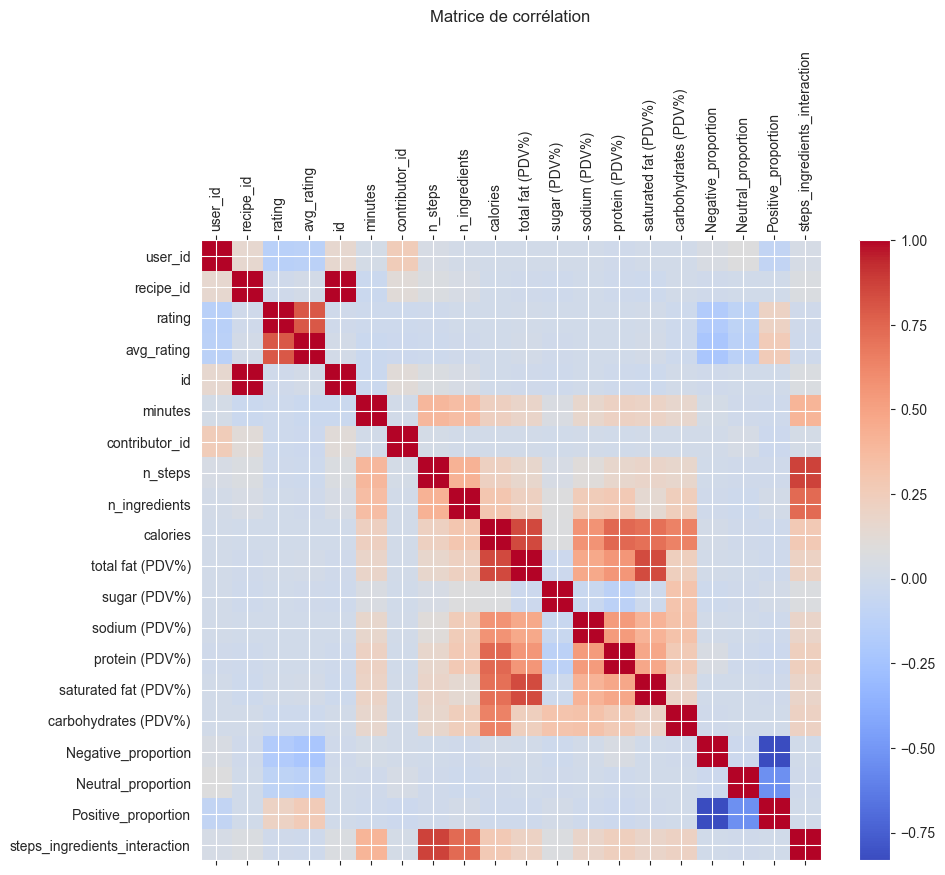

In [108]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = unique_recipes_df.select_dtypes(include=["float64", "int64"])

# Calculer la matrice de corrélation
correlation_matrix = numeric_columns.corr()

# Afficher la matrice de corrélation sous forme graphique
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title("Matrice de corrélation", pad=20)
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns)
plt.show()


In [110]:
numeric_columns = unique_recipes_df.select_dtypes(include=["float64", "int64"])

# Calculer la matrice de corrélation
correlation_matrix = numeric_columns.corr()

# Transformer la matrice de corrélation en format long pour identifier les paires
corr_pairs = (
    correlation_matrix
    .unstack()
    .reset_index()
    .rename(columns={0: "correlation", "level_0": "feature_1", "level_1": "feature_2"})
)

# Filtrer les corrélations pour éliminer les duplicats et les autocorrélations
filtered_corr = corr_pairs[
    (corr_pairs["feature_1"] != corr_pairs["feature_2"]) &  # Pas d'autocorrélations
    (corr_pairs["correlation"].abs() > 0.3)                # Seulement corrélations > 0.5 ou < -0.5
].sort_values(by="correlation", ascending=False)

# Afficher les corrélations les plus pertinentes
print("Corrélations les plus pertinentes :")
print(filtered_corr)

Corrélations les plus pertinentes :
                         feature_1                      feature_2  correlation
24                       recipe_id                             id     1.000000
81                              id                      recipe_id     1.000000
159                        n_steps  steps_ingredients_interaction     0.865680
387  steps_ingredients_interaction                        n_steps     0.865680
209               total fat (PDV%)                       calories     0.843543
190                       calories               total fat (PDV%)     0.843543
214               total fat (PDV%)           saturated fat (PDV%)     0.842306
290           saturated fat (PDV%)               total fat (PDV%)     0.842306
43                          rating                     avg_rating     0.795728
62                      avg_rating                         rating     0.795728
269                 protein (PDV%)                       calories     0.740342
193             

In [111]:
# Supprimer les doublons en conservant uniquement une version de chaque paire
filtered_corr_unique = filtered_corr[
    ~filtered_corr[["feature_1", "feature_2"]].apply(frozenset, axis=1).duplicated()
]

# Afficher les corrélations pertinentes sans doublons
print(filtered_corr_unique)


                feature_1                      feature_2  correlation
24              recipe_id                             id     1.000000
159               n_steps  steps_ingredients_interaction     0.865680
209      total fat (PDV%)                       calories     0.843543
214      total fat (PDV%)           saturated fat (PDV%)     0.842306
43                 rating                     avg_rating     0.795728
269        protein (PDV%)                       calories     0.740342
179         n_ingredients  steps_ingredients_interaction     0.734491
289  saturated fat (PDV%)                       calories     0.713249
309  carbohydrates (PDV%)                       calories     0.637572
192              calories                  sodium (PDV%)     0.564871
213      total fat (PDV%)                 protein (PDV%)     0.556399
272        protein (PDV%)                  sodium (PDV%)     0.534839
293  saturated fat (PDV%)                 protein (PDV%)     0.474825
250         sodium (

In [113]:
# Filtrer le DataFrame pour ne conserver que les colonnes numériques
numeric_df = unique_recipes_df.select_dtypes(include=['number'])

# Calculer la matrice de corrélation de Spearman
spearman_corr = numeric_df.corr(method="spearman")

# Afficher les résultats
print(spearman_corr)



                                user_id  recipe_id    rating  avg_rating  \
user_id                        1.000000   0.503544 -0.058295    0.018247   
recipe_id                      0.503544   1.000000  0.022485    0.112425   
rating                        -0.058295   0.022485  1.000000    0.704965   
avg_rating                     0.018247   0.112425  0.704965    1.000000   
id                             0.503544   1.000000  0.022485    0.112425   
minutes                        0.025308  -0.037138 -0.024641   -0.040429   
contributor_id                 0.400722   0.705837 -0.006061    0.054345   
n_steps                        0.075755   0.051671 -0.001152   -0.007815   
n_ingredients                  0.043686   0.031102 -0.004997   -0.005135   
calories                       0.012041   0.000966 -0.009191   -0.007058   
total fat (PDV%)               0.003307  -0.003445  0.013156    0.018847   
sugar (PDV%)                   0.015362  -0.006823  0.006658    0.008469   
sodium (PDV%

In [116]:
import numpy as np
import pandas as pd

# Seuil pour la significativité des corrélations
correlation_threshold = 0.5

# Créer un masque booléen pour la matrice de corrélation
mask = np.triu(np.ones(spearman_corr.shape), k=1).astype(bool)

# Appliquer le masque pour exclure la diagonale et les duplications symétriques
filtered_corr = spearman_corr.where(mask)

# Extraire les corrélations significatives
significant_corrs = filtered_corr.stack().reset_index()
significant_corrs.columns = ['Feature_1', 'Feature_2', 'Spearman_Correlation']

# Filtrer par seuil
significant_corrs = significant_corrs[significant_corrs['Spearman_Correlation'].abs() > correlation_threshold]

# Trier par ordre décroissant de corrélation
significant_corrs = significant_corrs.sort_values(by='Spearman_Correlation', ascending=False)

# Afficher les résultats
print(significant_corrs)



               Feature_1                      Feature_2  Spearman_Correlation
21             recipe_id                             id              1.000000
148     total fat (PDV%)           saturated fat (PDV%)              0.896215
123              n_steps  steps_ingredients_interaction              0.885379
135             calories               total fat (PDV%)              0.836072
138             calories                 protein (PDV%)              0.791852
134        n_ingredients  steps_ingredients_interaction              0.785862
139             calories           saturated fat (PDV%)              0.730225
71                    id                 contributor_id              0.705837
23             recipe_id                 contributor_id              0.705837
37                rating                     avg_rating              0.704965
162        sodium (PDV%)                 protein (PDV%)              0.657005
147     total fat (PDV%)                 protein (PDV%)         

In [117]:
# Combiner tous les ingrédients
all_ingredients = " ".join(unique_recipes_df["ingredients"].dropna().tolist()).split(", ")

# Compter la fréquence des ingrédients
ingredient_counts = Counter(all_ingredients)

# Afficher les 100 ingrédients les plus fréquents
print("\nLes 100 ingrédients les plus fréquents :")
print(ingredient_counts.most_common(100))



Les 100 ingrédients les plus fréquents :
[("'salt'", 51058), ("'onion'", 26053), ("'butter'", 23896), ("'sugar'", 19624), ("'olive oil'", 18516), ("'garlic cloves'", 17548), ("'eggs'", 16072), ("'water'", 15632), ("'milk'", 13749), ("'pepper'", 12597), ("'flour'", 11564), ("'garlic'", 11440), ("'egg'", 10728), ("'baking powder'", 10528), ("'brown sugar'", 8118), ("'lemon juice'", 7942), ("'parmesan cheese'", 7803), ("'baking soda'", 7688), ("'tomatoes'", 7632), ("'black pepper'", 7423), ("'garlic clove'", 7292), ("'all-purpose flour'", 7125), ("'garlic powder'", 6722), ("'vegetable oil'", 6520), ("'salt and pepper'", 6493), ("'celery'", 6311), ("'sour cream'", 6225), ("'mayonnaise'", 5727), ("'cinnamon'", 5434), ("'vanilla'", 5431), ("'onions'", 5346), ("'chicken broth'", 5168), ("'cheddar cheese'", 5058), ("'soy sauce'", 4988), ("'honey'", 4720), ("'extra virgin olive oil'", 4627), ("'oil'", 4578), ("'carrot'", 4540), ("'fresh parsley'", 4373), ("'chili powder'", 4354), ("'worcesters

In [120]:
from sklearn.feature_selection import mutual_info_regression

# Variable numérique cible
target = unique_recipes_df['Positive_proportion']

# Variable catégorique encodée (ordinale ou One-Hot)
categorical_var = pd.factorize(unique_recipes_df['n_steps'])[0]

# Calcul de l'information mutuelle
mi = mutual_info_regression(categorical_var.reshape(-1, 1), target)

print(f"Mutual Information: {mi}")


Mutual Information: [0]


In [122]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def calculate_cramers_v(cat_var, num_var, df):
    """
    Calcul de Cramer's V entre une variable catégorique et une variable numérique.
    """
    try:
        # Créer une table de contingence avec les quantiles pour la variable numérique
        contingency_table = pd.crosstab(df[cat_var], pd.qcut(df[num_var], q=4, duplicates='drop'))
        
        # Vérifier si les dimensions de la table sont valides
        if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
            return np.nan  # Pas assez de données pour calculer Cramer's V
        
        # Calcul du test du khi-deux
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Calcul du V de Cramer
        n = contingency_table.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
        return cramers_v
    except Exception as e:
        # En cas d'erreur (par exemple, trop peu de catégories ou de valeurs), retourner NaN
        return np.nan

# Variables catégoriques
categorical_vars = unique_recipes_df.select_dtypes(include=['object', 'category']).columns

# Variables numériques
numerical_vars = unique_recipes_df.select_dtypes(include=['int64', 'float64']).columns

# Calculer Cramer's V pour chaque combinaison
results = []
for cat_var in categorical_vars:
    for num_var in numerical_vars:
        cramers_v = calculate_cramers_v(cat_var, num_var, unique_recipes_df)
        results.append({'Categorical Variable': cat_var, 'Numerical Variable': num_var, 'Cramer\'s V': cramers_v})

# Convertir les résultats en DataFrame
cramers_v_df = pd.DataFrame(results)

# Trier par la valeur de Cramer's V pour afficher les corrélations les plus fortes
cramers_v_df = cramers_v_df.sort_values(by="Cramer's V", ascending=False)

# Afficher les résultats
print(cramers_v_df)



      Categorical Variable             Numerical Variable  Cramer's V
110              nutrition               total fat (PDV%)         1.0
111              nutrition                   sugar (PDV%)         1.0
115              nutrition           carbohydrates (PDV%)         1.0
127                  steps                        n_steps         1.0
109              nutrition                       calories         1.0
..                     ...                            ...         ...
255  health_classification           carbohydrates (PDV%)         NaN
256  health_classification            Negative_proportion         NaN
257  health_classification             Neutral_proportion         NaN
258  health_classification            Positive_proportion         NaN
259  health_classification  steps_ingredients_interaction         NaN

[260 rows x 3 columns]


In [124]:
# Afficher toutes les lignes dans un environnement interactif
cramers_v_df


,Categorical Variable,Numerical Variable,Cramer's V
110,nutrition,total fat (PDV%),1.0
111,nutrition,sugar (PDV%),1.0
115,nutrition,carbohydrates (PDV%),1.0
127,steps,n_steps,1.0
109,nutrition,calories,1.0
...,...,...,...
255,health_classification,carbohydrates (PDV%),NaN
256,health_classification,Negative_proportion,NaN
257,health_classification,Neutral_proportion,NaN
258,health_classification,Positive_proportion,NaN


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

def perform_anova(df, cat_vars, num_vars):
    """
    Effectue une analyse ANOVA entre les variables catégoriques et numériques.
    
    :param df: DataFrame contenant les données
    :param cat_vars: Liste des colonnes catégoriques
    :param num_vars: Liste des colonnes numériques
    :return: DataFrame avec les résultats de l'ANOVA
    """
    results = []
    
    for cat_var in cat_vars:
        for num_var in num_vars:
            try:
                # Grouper les données par la variable catégorique
                groups = [group[num_var].dropna().values for _, group in df.groupby(cat_var)]
                
                # Vérifier qu'il y a au moins deux groupes et qu'aucun groupe n'est constant
                if len(groups) > 1 and all(np.var(group) > 0 for group in groups):
                    # Calculer la statistique ANOVA
                    f_stat, p_val = f_oneway(*groups)
                    results.append({
                        'Categorical Variable': cat_var,
                        'Numerical Variable': num_var,
                        'F-Statistic': f_stat,
                        'P-Value': p_val
                    })
                else:
                    # Si pas assez de groupes ou variance constante
                    results.append({
                        'Categorical Variable': cat_var,
                        'Numerical Variable': num_var,
                        'F-Statistic': None,
                        'P-Value': None
                    })
            except Exception as e:
                # En cas d'erreur, ajouter une ligne vide
                results.append({
                    'Categorical Variable': cat_var,
                    'Numerical Variable': num_var,
                    'F-Statistic': None,
                    'P-Value': None
                })
    
    # Convertir les résultats en DataFrame
    return pd.DataFrame(results)

# Variables catégoriques
categorical_vars = unique_recipes_df.select_dtypes(include=['object', 'category']).columns

# Variables numériques
numerical_vars = unique_recipes_df.select_dtypes(include=['int64', 'float64']).columns

# Effectuer l'analyse ANOVA
anova_results = perform_anova(unique_recipes_df, categorical_vars, numerical_vars)

# Trier les résultats par p-valeur croissante
anova_results = anova_results.sort_values(by="P-Value", ascending=True)

# Afficher les résultats
print(anova_results)


In [39]:
import pandas as pd
import re
from collections import Counter

# Étape 1 : Convertir en chaînes et gérer les valeurs manquantes
merged_df['review'] = merged_df['review'].fillna("").astype(str)

# Fonction pour nettoyer le texte
def clean_text(text):
    # Supprimer les caractères spéciaux et les chiffres
    text = re.sub(r'[^\w\s]', '', text)  # Supprime la ponctuation
    text = re.sub(r'\d+', '', text)      # Supprime les chiffres
    return text.lower()                  # Met en minuscules

# Étape 2 : Nettoyer les commentaires
merged_df['cleaned_review'] = merged_df['review'].apply(clean_text)

# Étape 3 : Créer une liste de tous les mots
all_words = " ".join(merged_df['cleaned_review']).split()

# Étape 4 : Compter la fréquence des mots
word_counts = Counter(all_words)

# Étape 5 : Afficher les 10 mots les plus fréquents
most_common_words = word_counts.most_common()
print("Les mots les plus fréquents :")
print(most_common_words)

# Étape 6 (facultative) : Convertir en DataFrame pour visualiser
freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Afficher les fréquences dans un tableau
print("\nFréquence des mots :")
print(freq_df)



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




Fréquence des mots :
                         Word  Frequency
8                           i    1753073
4                         the    1668288
42                        and    1304836
95                          a    1012091
109                        it     848337
...                       ...        ...
98392   sprinklesmulticolored          1
98391                  stewey          1
98390         stillimpressive          1
98389             minibrioche          1
160340                eropean          1

[213787 rows x 2 columns]


In [40]:
# Étape 1 : Prétraitement - Gérer les valeurs manquantes et nettoyer le texte
merged_df['review'] = merged_df['review'].fillna("").astype(str)

def clean_and_split(text):
    # Supprimer les caractères spéciaux, les chiffres et diviser en mots
    text = re.sub(r'[^\w\s]', '', text)  # Supprime la ponctuation
    text = re.sub(r'\d+', '', text)      # Supprime les chiffres
    return text.lower().split()          # Mettre en minuscules et diviser en mots

# Ajouter la colonne `words`
merged_df['words'] = merged_df['review'].apply(clean_and_split)

# Étape 2 : Splitter la colonne `words` en plusieurs colonnes
# Trouver le nombre maximum de mots dans la colonne `words`
max_words = merged_df['words'].apply(len).max()

# Créer les nouvelles colonnes pour chaque mot
word_columns = [f'word_{i+1}' for i in range(max_words)]

# Ajouter les mots comme colonnes distinctes
words_split = pd.DataFrame(merged_df['words'].tolist(), columns=word_columns)

# Étape 3 : Combiner avec le DataFrame original
merged_df = pd.concat([merged_df, words_split], axis=1)

# Afficher le DataFrame final
print(merged_df)

           user_id  recipe_id        date  rating  \
0            76535     134728  2005-09-02       4   
1           273745     134728  2005-12-22       5   
2           353911     134728  2006-09-26       5   
3           190375     134728  2007-03-09       5   
4           468945     134728  2008-02-20       0   
...            ...        ...         ...     ...   
751487      102526      54493  2007-04-26       0   
751488      583662     386618  2009-09-29       5   
751489      157126      78003  2008-06-23       5   
751490       53932      78003  2009-01-11       4   
751491  2001868099      78003  2017-12-18       5   

                                                   review  avg_rating  \
0                                              Very good!    4.142857   
1                                  Better than the real!!    4.142857   
2       Absolutely AWESOME! I was speechless when I tr...    4.142857   
3       These taste absolutely wonderful!!  My son-in-...    4.142857  

In [41]:
merged_df.head()

,user_id,recipe_id,date,rating,review,avg_rating,name,id,minutes,contributor_id,...,word_1160,word_1161,word_1162,word_1163,word_1164,word_1165,word_1166,word_1167,word_1168,word_1169
0,76535,134728,2005-09-02,4,Very good!,4.142857,kfc honey bbq strips,134728,40,166019,...,None,None,None,None,None,None,None,None,None,None
1,273745,134728,2005-12-22,5,Better than the real!!,4.142857,kfc honey bbq strips,134728,40,166019,...,None,None,None,None,None,None,None,None,None,None
2,353911,134728,2006-09-26,5,Absolutely AWESOME! I was speechless when I tr...,4.142857,kfc honey bbq strips,134728,40,166019,...,None,None,None,None,None,None,None,None,None,None
3,190375,134728,2007-03-09,5,These taste absolutely wonderful!! My son-in-...,4.142857,kfc honey bbq strips,134728,40,166019,...,None,None,None,None,None,None,None,None,None,None
4,468945,134728,2008-02-20,0,Made my own buttermilk w/ vinegar and milk. U...,4.142857,kfc honey bbq strips,134728,40,166019,...,None,None,None,None,None,None,None,None,None,None


In [42]:
import pandas as pd

# Étape 1 : Collecter tous les mots uniques
word_columns = [col for col in merged_df.columns if col.startswith("word_")]

# Extraire tous les mots uniques
all_words = pd.concat([merged_df[col] for col in word_columns]).dropna().tolist()

# Calculer la fréquence de chaque mot
from collections import Counter
word_frequencies = Counter(all_words)

# Étape 2 : Afficher les mots les plus fréquents (pour annoter les polarités manuellement)
print("Fréquence des mots :")



Fréquence des mots :


In [43]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import download

# Télécharger les ressources nécessaires pour NLTK (y compris VADER)
download('vader_lexicon')

# Initialiser l'analyseur de sentiment
sia = SentimentIntensityAnalyzer()

# Étape 1 : Collecter toutes les colonnes contenant des mots
word_columns = [col for col in merged_df.columns if col.startswith("word_")]

# Étape 2 : Fonction pour classer les mots automatiquement
def classify_word(word):
    if pd.isna(word) or word == "":  # Si le mot est vide ou NaN
        return None
    sentiment_score = sia.polarity_scores(word)['compound']  # Score global de polarité
    if sentiment_score > 0.05:  # Positif
        return "Positive"
    elif sentiment_score < -0.05:  # Négatif
        return "Negative"
    else:  # Neutre
        return "Neutral"

# Étape 3 : Appliquer la classification à chaque colonne contenant des mots
for col in word_columns:
    merged_df[f"{col}_sentiment"] = merged_df[col].apply(classify_word)

# Afficher le DataFrame final avec les polarités
print("\nDataFrame avec polarité des mots :")
print(merged_df)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\awand\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


KeyboardInterrupt: 

In [45]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import download

# Télécharger les ressources nécessaires pour NLTK
download('vader_lexicon')

# Initialiser l'analyseur de sentiment
sia = SentimentIntensityAnalyzer()

# Étape 1 : Collecter toutes les colonnes contenant des mots
word_columns = [col for col in merged_df.columns if col.startswith("word_")]

# Étape 2 : Fonction pour classifier un mot
def classify_word(word):
    if pd.isna(word) or word == "":  # Si le mot est vide ou NaN
        return None
    sentiment_score = sia.polarity_scores(word)['compound']  # Score global de polarité
    if sentiment_score > 0.05:
        return "Positive"
    elif sentiment_score < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Étape 3 : Appliquer la classification à toutes les colonnes et combiner les résultats
sentiment_data = {
    f"{col}_sentiment": merged_df[col].apply(classify_word) for col in word_columns
}

# Créer un DataFrame pour les sentiments
sentiment_df = pd.DataFrame(sentiment_data)

# Étape 4 : Combiner avec le DataFrame original
merged_df = pd.concat([merged_df, sentiment_df], axis=1)

# Afficher le DataFrame final
print("\nDataFrame avec polarité des mots :")
print(merged_df)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\awand\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



DataFrame avec polarité des mots :
           user_id  recipe_id        date  rating  \
0            76535     134728  2005-09-02       4   
1           273745     134728  2005-12-22       5   
2           353911     134728  2006-09-26       5   
3           190375     134728  2007-03-09       5   
4           468945     134728  2008-02-20       0   
...            ...        ...         ...     ...   
751487      102526      54493  2007-04-26       0   
751488      583662     386618  2009-09-29       5   
751489      157126      78003  2008-06-23       5   
751490       53932      78003  2009-01-11       4   
751491  2001868099      78003  2017-12-18       5   

                                                   review  avg_rating  \
0                                              Very good!    4.142857   
1                                  Better than the real!!    4.142857   
2       Absolutely AWESOME! I was speechless when I tr...    4.142857   
3       These taste absolutely wond

In [46]:
merged_df.head()

,user_id,recipe_id,date,rating,review,avg_rating,name,id,minutes,contributor_id,...,word_300_sentiment_sentiment,word_301_sentiment_sentiment,word_302_sentiment_sentiment,word_303_sentiment_sentiment,word_304_sentiment_sentiment,word_305_sentiment_sentiment,word_306_sentiment_sentiment,word_307_sentiment_sentiment,word_308_sentiment_sentiment,word_309_sentiment_sentiment
0,76535,134728,2005-09-02,4,Very good!,4.142857,kfc honey bbq strips,134728,40,166019,...,None,None,None,None,None,None,None,None,None,None
1,273745,134728,2005-12-22,5,Better than the real!!,4.142857,kfc honey bbq strips,134728,40,166019,...,None,None,None,None,None,None,None,None,None,None
2,353911,134728,2006-09-26,5,Absolutely AWESOME! I was speechless when I tr...,4.142857,kfc honey bbq strips,134728,40,166019,...,None,None,None,None,None,None,None,None,None,None
3,190375,134728,2007-03-09,5,These taste absolutely wonderful!! My son-in-...,4.142857,kfc honey bbq strips,134728,40,166019,...,None,None,None,None,None,None,None,None,None,None
4,468945,134728,2008-02-20,0,Made my own buttermilk w/ vinegar and milk. U...,4.142857,kfc honey bbq strips,134728,40,166019,...,None,None,None,None,None,None,None,None,None,None


In [47]:
merged_df.describe()

,user_id,recipe_id,rating,avg_rating,id,minutes,contributor_id,n_steps,n_ingredients,calories,...,sodium (PDV%),protein (PDV%),saturated fat (PDV%),carbohydrates (PDV%),total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%)
count,7.514920e+05,751492.000000,751492.000000,751492.000000,751492.000000,751492.000000,7.514920e+05,751492.000000,751492.000000,751492.000000,...,751492.000000,751492.000000,751492.000000,751492.000000,751492.000000,751492.000000,751492.000000,751492.000000,751492.000000,751492.000000
mean,1.311303e+08,168544.092129,4.430449,4.430449,168544.092129,38.266494,2.682031e+06,9.159050,8.788712,285.387835,...,19.520213,26.844875,26.541718,8.138064,21.402483,26.516552,19.520213,26.844875,26.541718,8.138064
std,4.890215e+08,131321.117011,1.225639,0.616670,131321.117011,24.989245,6.772052e+07,5.072388,3.545070,182.443898,...,18.987194,26.614116,26.144335,6.724815,18.487948,25.848074,18.987194,26.614116,26.144335,6.724815
min,1.533000e+03,45.000000,0.000000,0.000000,45.000000,0.000000,2.700000e+01,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.364650e+05,59898.000000,4.000000,4.250000,59898.000000,20.000000,3.777900e+04,6.000000,6.000000,146.300000,...,5.000000,6.000000,6.000000,3.000000,7.000000,7.000000,5.000000,6.000000,6.000000,3.000000
50%,3.279890e+05,131708.500000,5.000000,4.545455,131708.500000,34.000000,9.965500e+04,8.000000,8.000000,250.200000,...,13.000000,16.000000,18.000000,7.000000,16.000000,17.000000,13.000000,16.000000,18.000000,7.000000
75%,7.705850e+05,256004.000000,5.000000,4.818182,256004.000000,50.000000,2.688880e+05,12.000000,11.000000,389.600000,...,29.000000,45.000000,39.000000,12.000000,31.000000,39.000000,29.000000,45.000000,39.000000,12.000000
max,2.002373e+09,537716.000000,5.000000,5.000000,537716.000000,128.000000,2.002285e+09,86.000000,43.000000,1384.900000,...,95.000000,120.000000,121.000000,36.000000,115.000000,103.000000,95.000000,120.000000,121.000000,36.000000


,user_id,recipe_id,date,rating,review,avg_rating,name,id,minutes,contributor_id,...,word_300_sentiment_sentiment,word_301_sentiment_sentiment,word_302_sentiment_sentiment,word_303_sentiment_sentiment,word_304_sentiment_sentiment,word_305_sentiment_sentiment,word_306_sentiment_sentiment,word_307_sentiment_sentiment,word_308_sentiment_sentiment,word_309_sentiment_sentiment
727857,7779572,110047,2015-01-15,4,I don&#039;t need to make this recipe myself t...,3.965278,potsie s creamed chicken and biscuits casserole,110047,45,183964,...,Neutral,Neutral,Neutral,Neutral,Neutral,Positive,Neutral,Neutral,Neutral,Neutral


In [49]:
import pandas as pd

# Étape 1 : Combiner toutes les colonnes de sentiments en une seule colonne par recette
sentiment_columns = [col for col in merged_df.columns if col.endswith("_sentiment")]

# Rassembler les sentiments pour chaque recette
merged_df["all_sentiments"] = merged_df[sentiment_columns].values.tolist()

# Étape 2 : Compter les proportions de sentiments (positifs, négatifs, neutres)
def calculate_sentiment_proportions(sentiments):
    # Filtrer les valeurs non-nulles
    valid_sentiments = [s for s in sentiments if pd.notna(s)]
    total = len(valid_sentiments)
    if total == 0:
        return {"Positive": 0, "Negative": 0, "Neutral": 0}
    return {
        "Positive": valid_sentiments.count("Positive") / total,
        "Negative": valid_sentiments.count("Negative") / total,
        "Neutral": valid_sentiments.count("Neutral") / total
    }

# Appliquer la fonction pour chaque ligne
merged_df["sentiment_proportions"] = merged_df["all_sentiments"].apply(calculate_sentiment_proportions)

# Étape 3 : Extraire les proportions dans des colonnes séparées
merged_df["Positive_score"] = merged_df["sentiment_proportions"].apply(lambda x: x["Positive"])
merged_df["Negative_score"] = merged_df["sentiment_proportions"].apply(lambda x: x["Negative"])
merged_df["Neutral_score"] = merged_df["sentiment_proportions"].apply(lambda x: x["Neutral"])

# Supprimer les colonnes intermédiaires si nécessaire
merged_df.drop(columns=["all_sentiments", "sentiment_proportions"], inplace=True)



In [50]:
merged_df.head()

,user_id,recipe_id,date,rating,review,avg_rating,name,id,minutes,contributor_id,...,word_303_sentiment_sentiment,word_304_sentiment_sentiment,word_305_sentiment_sentiment,word_306_sentiment_sentiment,word_307_sentiment_sentiment,word_308_sentiment_sentiment,word_309_sentiment_sentiment,Positive_score,Negative_score,Neutral_score
0,76535,134728,2005-09-02,4,Very good!,4.142857,kfc honey bbq strips,134728,40,166019,...,None,None,None,None,None,None,None,0.500000,0.0,0.500000
1,273745,134728,2005-12-22,5,Better than the real!!,4.142857,kfc honey bbq strips,134728,40,166019,...,None,None,None,None,None,None,None,0.250000,0.0,0.750000
2,353911,134728,2006-09-26,5,Absolutely AWESOME! I was speechless when I tr...,4.142857,kfc honey bbq strips,134728,40,166019,...,None,None,None,None,None,None,None,0.029412,0.0,0.970588
3,190375,134728,2007-03-09,5,These taste absolutely wonderful!! My son-in-...,4.142857,kfc honey bbq strips,134728,40,166019,...,None,None,None,None,None,None,None,0.125000,0.0,0.875000
4,468945,134728,2008-02-20,0,Made my own buttermilk w/ vinegar and milk. U...,4.142857,kfc honey bbq strips,134728,40,166019,...,None,None,None,None,None,None,None,0.035088,0.0,0.964912


In [52]:
# Identifier les colonnes contenant le mot "word"
columns_to_drop = [col for col in merged_df.columns if "word" in col]

# Supprimer ces colonnes dans le DataFrame copié
merged_df.drop(columns=columns_to_drop, inplace=True)

merged_df.head()


,user_id,recipe_id,date,rating,review,avg_rating,name,id,minutes,contributor_id,...,total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%),cleaned_review,Positive_score,Negative_score,Neutral_score
0,76535,134728,2005-09-02,4,Very good!,4.142857,kfc honey bbq strips,134728,40,166019,...,4.0,40.0,37.0,78.0,4.0,10.0,very good,0.500000,0.0,0.500000
1,273745,134728,2005-12-22,5,Better than the real!!,4.142857,kfc honey bbq strips,134728,40,166019,...,4.0,40.0,37.0,78.0,4.0,10.0,better than the real,0.250000,0.0,0.750000
2,353911,134728,2006-09-26,5,Absolutely AWESOME! I was speechless when I tr...,4.142857,kfc honey bbq strips,134728,40,166019,...,4.0,40.0,37.0,78.0,4.0,10.0,absolutely awesome i was speechless when i tri...,0.029412,0.0,0.970588
3,190375,134728,2007-03-09,5,These taste absolutely wonderful!! My son-in-...,4.142857,kfc honey bbq strips,134728,40,166019,...,4.0,40.0,37.0,78.0,4.0,10.0,these taste absolutely wonderful my soninlaw ...,0.125000,0.0,0.875000
4,468945,134728,2008-02-20,0,Made my own buttermilk w/ vinegar and milk. U...,4.142857,kfc honey bbq strips,134728,40,166019,...,4.0,40.0,37.0,78.0,4.0,10.0,made my own buttermilk w vinegar and milk use...,0.035088,0.0,0.964912


In [55]:
# Vérifier si les colonnes existent avant de les supprimer
columns_to_remove = ["steps", "description", "review", "cleaned_review", "nutrition", "tags", "date", "nutrition", "submitted"]

# Supprimer les colonnes si elles sont présentes
merged_df = merged_df.drop(columns=[col for col in columns_to_remove if col in merged_df.columns])

merged_df.head().head()

,user_id,recipe_id,rating,avg_rating,name,id,minutes,contributor_id,n_steps,ingredients,...,carbohydrates (PDV%),total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%),Positive_score,Negative_score,Neutral_score
0,76535,134728,4,4.142857,kfc honey bbq strips,134728,40,166019,10,"['chicken tenders', 'flour', 'garlic powder', ...",...,10.0,4.0,40.0,37.0,78.0,4.0,10.0,0.500000,0.0,0.500000
1,273745,134728,5,4.142857,kfc honey bbq strips,134728,40,166019,10,"['chicken tenders', 'flour', 'garlic powder', ...",...,10.0,4.0,40.0,37.0,78.0,4.0,10.0,0.250000,0.0,0.750000
2,353911,134728,5,4.142857,kfc honey bbq strips,134728,40,166019,10,"['chicken tenders', 'flour', 'garlic powder', ...",...,10.0,4.0,40.0,37.0,78.0,4.0,10.0,0.029412,0.0,0.970588
3,190375,134728,5,4.142857,kfc honey bbq strips,134728,40,166019,10,"['chicken tenders', 'flour', 'garlic powder', ...",...,10.0,4.0,40.0,37.0,78.0,4.0,10.0,0.125000,0.0,0.875000
4,468945,134728,0,4.142857,kfc honey bbq strips,134728,40,166019,10,"['chicken tenders', 'flour', 'garlic powder', ...",...,10.0,4.0,40.0,37.0,78.0,4.0,10.0,0.035088,0.0,0.964912


In [57]:
# Identifier les colonnes à exclure (celles contenant le mot 'id')
columns_to_exclude = [col for col in merged_df.columns if "id" in col]

# Sélectionner uniquement les colonnes numériques sans celles à exclure
columns_for_correlation = [
    col for col in merged_df.select_dtypes(include=["number"]).columns 
    if col not in columns_to_exclude
]

# Calculer la matrice de corrélation
correlation_matrix = merged_df[columns_for_correlation].corr()

# Afficher la matrice de corrélation
print("\nMatrice de corrélation :")
print(correlation_matrix)



Matrice de corrélation :
                        rating  avg_rating   minutes   n_steps  n_ingredients  \
rating                1.000000    0.503141 -0.019463 -0.017018       0.000630   
avg_rating            0.503141    1.000000 -0.038682 -0.033823       0.001252   
minutes              -0.019463   -0.038682  1.000000  0.357720       0.331110   
n_steps              -0.017018   -0.033823  0.357720  1.000000       0.375812   
n_ingredients         0.000630    0.001252  0.331110  0.375812       1.000000   
calories              0.001282    0.002547  0.226903  0.188390       0.286245   
total fat (PDV%)      0.011137    0.022134  0.173308  0.134450       0.203591   
sugar (PDV%)         -0.006736   -0.013387  0.073721  0.049422       0.087134   
sodium (PDV%)        -0.001704   -0.003386  0.190289  0.100935       0.276624   
protein (PDV%)        0.000383    0.000762  0.207794  0.148344       0.265416   
saturated fat (PDV%)  0.008467    0.016829  0.183771  0.152794       0.142873   
ca

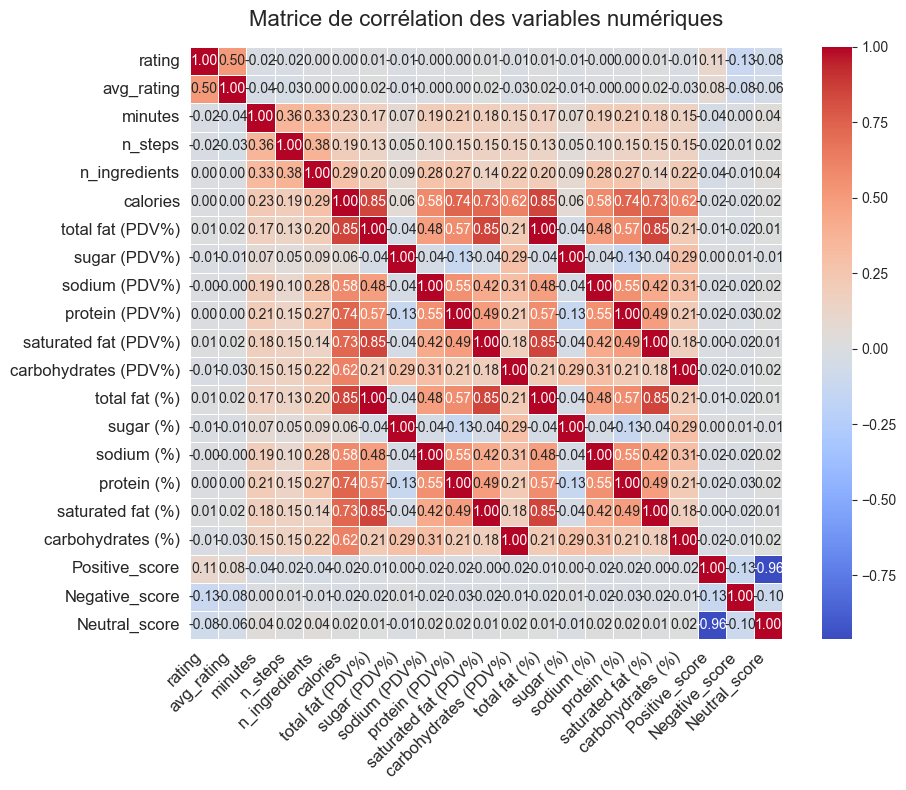

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création du plot pour la matrice de corrélation
plt.figure(figsize=(10, 8))  # Ajuste la taille du graphique
sns.heatmap(
    correlation_matrix,       # Utilise la matrice de corrélation calculée
    annot=True,               # Affiche les valeurs de corrélation
    fmt=".2f",                # Format des valeurs (2 décimales)
    cmap="coolwarm",          # Palette de couleurs
    cbar=True,                # Affiche la barre de couleur
    square=True,              # Carrés uniformes
    linewidths=0.5            # Épaisseur des séparations
)

# Ajouter un titre et ajuster les axes
plt.title("Matrice de corrélation des variables numériques", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Afficher le graphique
plt.show()


In [59]:
# Calculer la matrice de corrélation (si non déjà calculée)
# correlation_matrix = merged_df[columns_for_correlation].corr()

# Convertir la matrice de corrélation en un DataFrame exploitable
correlation_pairs = (
    correlation_matrix
    .abs()  # Prend les valeurs absolues des corrélations
    .unstack()  # Transforme la matrice en liste de paires
    .reset_index()  # Réinitialise l'index pour une meilleure lisibilité
)

# Renommer les colonnes pour plus de clarté
correlation_pairs.columns = ["Variable_1", "Variable_2", "Correlation"]

# Supprimer les doublons et les auto-corrélations (corrélation de la variable avec elle-même)
correlation_pairs = correlation_pairs[correlation_pairs["Variable_1"] != correlation_pairs["Variable_2"]]
correlation_pairs = correlation_pairs.drop_duplicates(subset=["Correlation"], keep="first")

# Trier les corrélations par ordre décroissant
correlation_pairs_sorted = correlation_pairs.sort_values(by="Correlation", ascending=False)

# Afficher les corrélations les plus pertinentes
top_correlations = correlation_pairs_sorted.head(10)  # Les 10 corrélations les plus fortes
print("\nLes corrélations les plus fortes :")
print(top_correlations)



Les corrélations les plus fortes :
           Variable_1            Variable_2  Correlation
138  total fat (PDV%)         total fat (%)     1.000000
398    Positive_score         Neutral_score     0.961768
136  total fat (PDV%)  saturated fat (PDV%)     0.849799
111          calories      total fat (PDV%)     0.847819
114          calories        protein (PDV%)     0.735251
115          calories  saturated fat (PDV%)     0.725603
116          calories  carbohydrates (PDV%)     0.619586
113          calories         sodium (PDV%)     0.582869
135  total fat (PDV%)        protein (PDV%)     0.565070
177     sodium (PDV%)        protein (PDV%)     0.549072


In [73]:
merged_df.shape

(751492, 27)

In [74]:
merged_df.head()


,user_id,recipe_id,rating,avg_rating,name,id,minutes,contributor_id,n_steps,ingredients,...,carbohydrates (PDV%),total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%),Positive_score,Negative_score,Neutral_score
0,76535,134728,4,4.142857,kfc honey bbq strips,134728,40,166019,10,"['chicken tenders', 'flour', 'garlic powder', ...",...,10.0,4.0,40.0,37.0,78.0,4.0,10.0,0.500000,0.0,0.500000
1,273745,134728,5,4.142857,kfc honey bbq strips,134728,40,166019,10,"['chicken tenders', 'flour', 'garlic powder', ...",...,10.0,4.0,40.0,37.0,78.0,4.0,10.0,0.250000,0.0,0.750000
2,353911,134728,5,4.142857,kfc honey bbq strips,134728,40,166019,10,"['chicken tenders', 'flour', 'garlic powder', ...",...,10.0,4.0,40.0,37.0,78.0,4.0,10.0,0.029412,0.0,0.970588
3,190375,134728,5,4.142857,kfc honey bbq strips,134728,40,166019,10,"['chicken tenders', 'flour', 'garlic powder', ...",...,10.0,4.0,40.0,37.0,78.0,4.0,10.0,0.125000,0.0,0.875000
4,468945,134728,0,4.142857,kfc honey bbq strips,134728,40,166019,10,"['chicken tenders', 'flour', 'garlic powder', ...",...,10.0,4.0,40.0,37.0,78.0,4.0,10.0,0.035088,0.0,0.964912


In [76]:
# Calculer la moyenne des scores par recipe_id
average_scores = merged_df.groupby("recipe_id")[["Positive_score", "Neutral_score", "Negative_score"]].mean()

# Réinitialiser l'index pour obtenir un DataFrame nettoyé
average_scores = average_scores.reset_index()

# Afficher le DataFrame des scores moyens
average_scores.head(10)

,recipe_id,Positive_score,Neutral_score,Negative_score
0,45,0.055512,0.928000,0.016487
1,46,0.100962,0.899038,0.000000
2,49,0.079108,0.912430,0.008462
3,59,0.166667,0.833333,0.000000
4,62,0.117188,0.879325,0.003487
5,81,0.083916,0.916084,0.000000
6,92,0.100282,0.899718,0.000000
7,93,0.120907,0.879093,0.000000
8,113,0.040000,0.920000,0.040000
9,119,0.096983,0.903017,0.000000


In [77]:
# Fusionner les moyennes des scores avec le DataFrame original
merged_df_with_averages = pd.merge(merged_df, average_scores, on="recipe_id", suffixes=('', '_mean'))

# Afficher le DataFrame fusionné
print("\nDataFrame fusionné avec scores moyens :")
merged_df_with_averages.head(10)



DataFrame fusionné avec scores moyens :


,user_id,recipe_id,rating,avg_rating,name,id,minutes,contributor_id,n_steps,ingredients,...,sodium (%),protein (%),saturated fat (%),carbohydrates (%),Positive_score,Negative_score,Neutral_score,Positive_score_mean,Neutral_score_mean,Negative_score_mean
0,76535,134728,4,4.142857,kfc honey bbq strips,134728,40,166019,10,"['chicken tenders', 'flour', 'garlic powder', ...",...,37.0,78.0,4.0,10.0,0.500000,0.000000,0.500000,0.159288,0.838700,0.002012
1,273745,134728,5,4.142857,kfc honey bbq strips,134728,40,166019,10,"['chicken tenders', 'flour', 'garlic powder', ...",...,37.0,78.0,4.0,10.0,0.250000,0.000000,0.750000,0.159288,0.838700,0.002012
2,353911,134728,5,4.142857,kfc honey bbq strips,134728,40,166019,10,"['chicken tenders', 'flour', 'garlic powder', ...",...,37.0,78.0,4.0,10.0,0.029412,0.000000,0.970588,0.159288,0.838700,0.002012
3,190375,134728,5,4.142857,kfc honey bbq strips,134728,40,166019,10,"['chicken tenders', 'flour', 'garlic powder', ...",...,37.0,78.0,4.0,10.0,0.125000,0.000000,0.875000,0.159288,0.838700,0.002012
4,468945,134728,0,4.142857,kfc honey bbq strips,134728,40,166019,10,"['chicken tenders', 'flour', 'garlic powder', ...",...,37.0,78.0,4.0,10.0,0.035088,0.000000,0.964912,0.159288,0.838700,0.002012
5,255338,134728,5,4.142857,kfc honey bbq strips,134728,40,166019,10,"['chicken tenders', 'flour', 'garlic powder', ...",...,37.0,78.0,4.0,10.0,0.076923,0.000000,0.923077,0.159288,0.838700,0.002012
6,1171894,134728,5,4.142857,kfc honey bbq strips,134728,40,166019,10,"['chicken tenders', 'flour', 'garlic powder', ...",...,37.0,78.0,4.0,10.0,0.098592,0.014085,0.887324,0.159288,0.838700,0.002012
7,136726,197160,5,5.000000,mexican hots,197160,20,215057,2,"['hamburger', 'breadcrumbs', 'egg', 'salt', 'b...",...,20.0,54.0,27.0,4.0,0.022989,0.000000,0.977011,0.022989,0.977011,0.000000
8,202555,225241,5,3.666667,chicken tamale pie for 2 ww core,225241,45,67656,17,"['cooking spray', 'onion', 'green peppers', 'g...",...,21.0,44.0,3.0,11.0,0.079365,0.047619,0.873016,0.098526,0.885962,0.015512
9,353579,225241,5,3.666667,chicken tamale pie for 2 ww core,225241,45,67656,17,"['cooking spray', 'onion', 'green peppers', 'g...",...,21.0,44.0,3.0,11.0,0.125000,0.000000,0.875000,0.098526,0.885962,0.015512


In [78]:
# Supprimer les doublons pour ne garder que les recipe_id uniques
unique_recipes_df = merged_df_with_averages.drop_duplicates(subset="recipe_id")

# Afficher le DataFrame avec des recipe_id uniques
unique_recipes_df.head()


,user_id,recipe_id,rating,avg_rating,name,id,minutes,contributor_id,n_steps,ingredients,...,sodium (%),protein (%),saturated fat (%),carbohydrates (%),Positive_score,Negative_score,Neutral_score,Positive_score_mean,Neutral_score_mean,Negative_score_mean
0,76535,134728,4,4.142857,kfc honey bbq strips,134728,40,166019,10,"['chicken tenders', 'flour', 'garlic powder', ...",...,37.0,78.0,4.0,10.0,0.500000,0.000000,0.500000,0.159288,0.838700,0.002012
7,136726,197160,5,5.000000,mexican hots,197160,20,215057,2,"['hamburger', 'breadcrumbs', 'egg', 'salt', 'b...",...,20.0,54.0,27.0,4.0,0.022989,0.000000,0.977011,0.022989,0.977011,0.000000
8,202555,225241,5,3.666667,chicken tamale pie for 2 ww core,225241,45,67656,17,"['cooking spray', 'onion', 'green peppers', 'g...",...,21.0,44.0,3.0,11.0,0.079365,0.047619,0.873016,0.098526,0.885962,0.015512
14,483827,306785,5,5.000000,spicy nectarine and corn salsa,306785,40,377499,4,"['nectarines', 'ear of corn', 'shallot', 'haba...",...,16.0,5.0,0.0,7.0,0.100000,0.011111,0.888889,0.100000,0.888889,0.011111
15,56680,79222,5,3.960000,potato crab chowder,79222,45,115419,8,"['butter', 'onion', 'garlic', 'potatoes', 'flo...",...,18.0,32.0,22.0,12.0,0.166667,0.000000,0.833333,0.073393,0.923017,0.003590


In [85]:
# Liste des colonnes à supprimer
columns_to_remove = ['total fat (%)',
       'carbohydrates (%)', 'Negative_score']  # Remplace par les colonnes que tu veux supprimer

# Supprimer les colonnes
unique_recipes_df = unique_recipes_df.drop(columns=columns_to_remove)

# Afficher le DataFrame nettoyé
print("\nDataFrame après suppression des colonnes spécifiées :")
unique_recipes_df.head(10)



DataFrame après suppression des colonnes spécifiées :


,user_id,recipe_id,rating,avg_rating,name,id,minutes,contributor_id,n_steps,ingredients,...,calories,total fat (PDV%),sugar (PDV%),sodium (PDV%),protein (PDV%),saturated fat (PDV%),carbohydrates (PDV%),Positive_score_mean,Neutral_score_mean,Negative_score_mean
0,76535,134728,4,4.142857,kfc honey bbq strips,134728,40,166019,10,"['chicken tenders', 'flour', 'garlic powder', ...",...,316.0,4.0,40.0,37.0,78.0,4.0,10.0,0.159288,0.838700,0.002012
7,136726,197160,5,5.000000,mexican hots,197160,20,215057,2,"['hamburger', 'breadcrumbs', 'egg', 'salt', 'b...",...,308.0,23.0,11.0,20.0,54.0,27.0,4.0,0.022989,0.977011,0.000000
8,202555,225241,5,3.666667,chicken tamale pie for 2 ww core,225241,45,67656,17,"['cooking spray', 'onion', 'green peppers', 'g...",...,248.0,4.0,28.0,21.0,44.0,3.0,11.0,0.098526,0.885962,0.015512
14,483827,306785,5,5.000000,spicy nectarine and corn salsa,306785,40,377499,4,"['nectarines', 'ear of corn', 'shallot', 'haba...",...,95.3,1.0,50.0,16.0,5.0,0.0,7.0,0.100000,0.888889,0.011111
15,56680,79222,5,3.960000,potato crab chowder,79222,45,115419,8,"['butter', 'onion', 'garlic', 'potatoes', 'flo...",...,274.2,12.0,15.0,18.0,32.0,22.0,12.0,0.073393,0.923017,0.003590
16,5060,310237,5,5.000000,french strawberry crepes,310237,30,452576,9,"['strawberries', 'brown sugar', 'cool whip fre...",...,143.5,5.0,25.0,3.0,10.0,3.0,7.0,0.145161,0.854839,0.000000
17,935485,321038,5,5.000000,hg s grab n go breakfast cookies weight wat...,321038,22,346383,14,"['oats', 'whole wheat flour', 'fiber one cerea...",...,182.4,2.0,50.0,7.0,11.0,1.0,13.0,0.083777,0.916223,0.000000
19,6258,20930,5,5.000000,2 tomato pasta salad,20930,30,29196,8,"['pasta', 'bacon', 'red peppers', 'sun-dried t...",...,549.0,40.0,41.0,20.0,38.0,34.0,20.0,0.068288,0.897774,0.033937
21,172467,29093,5,3.333333,petit gateau,29093,27,30475,19,"['dark chocolate', 'unsalted butter', 'eggs', ...",...,425.4,49.0,90.0,1.0,15.0,94.0,11.0,0.125624,0.874376,0.000000
41,49304,180132,5,4.750000,chicken vegetable soup low carb low fat,180132,55,316498,6,"['skinless chicken breasts', 'carrots', 'celer...",...,97.4,2.0,9.0,5.0,28.0,2.0,1.0,0.192978,0.758972,0.048050


In [87]:
unique_recipes_df.shape

(154356, 21)

In [89]:
unique_recipes_df.describe()

,user_id,recipe_id,rating,avg_rating,id,minutes,contributor_id,n_steps,n_ingredients,calories,total fat (PDV%),sugar (PDV%),sodium (PDV%),protein (PDV%),saturated fat (PDV%),carbohydrates (PDV%),Positive_score_mean,Neutral_score_mean,Negative_score_mean
count,1.543560e+05,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000,1.543560e+05,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000,154356.000000
mean,3.851929e+07,230426.844625,4.453989,4.366957,230426.844625,37.854933,5.297779e+06,9.310548,8.913246,287.430537,21.643467,26.236667,18.513138,26.647782,26.102464,8.188901,0.096818,0.893273,0.009744
std,2.694607e+08,139322.059064,1.104217,0.954568,139322.059064,25.113150,9.723147e+07,5.337820,3.599669,188.195556,19.174804,25.218488,18.656338,26.480563,26.241471,6.917826,0.062087,0.062563,0.014707
min,1.533000e+03,45.000000,0.000000,0.000000,45.000000,0.000000,2.700000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.919525e+04,110966.750000,4.000000,4.000000,110966.750000,20.000000,6.012400e+04,6.000000,6.000000,143.000000,7.000000,7.000000,4.000000,6.000000,6.000000,3.000000,0.065128,0.875838,0.000000
50%,2.238220e+05,218927.500000,5.000000,4.714286,218927.500000,31.000000,1.944690e+05,8.000000,9.000000,250.500000,17.000000,18.000000,13.000000,16.000000,18.000000,7.000000,0.087500,0.902348,0.005952
75%,4.857280e+05,341599.000000,5.000000,5.000000,341599.000000,50.000000,4.230760e+05,12.000000,11.000000,395.100000,31.000000,38.000000,28.000000,43.000000,39.000000,12.000000,0.113859,0.924904,0.014220
max,2.002367e+09,537716.000000,5.000000,5.000000,537716.000000,128.000000,2.002285e+09,86.000000,43.000000,1384.900000,115.000000,103.000000,95.000000,120.000000,121.000000,36.000000,1.000000,1.000000,0.666667


In [90]:
# Supprimer les lignes où les trois colonnes valent 0 simultanément
unique_recipes_df = unique_recipes_df[
    ~(
        (unique_recipes_df["Positive_score_mean"] == 0) & 
        (unique_recipes_df["Negative_score_mean"] == 0) & 
        (unique_recipes_df["Neutral_score_mean"] == 0)
    )
]

# Afficher la nouvelle dim 
unique_recipes_df.shape


(154342, 21)

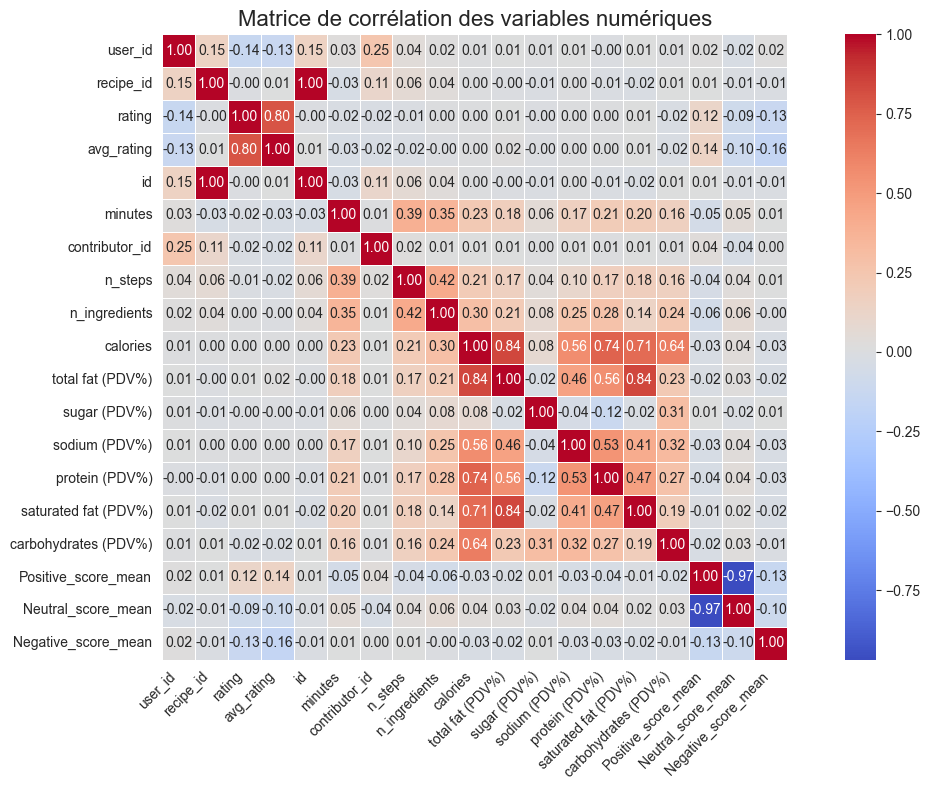

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner uniquement les colonnes numériques
numeric_columns = unique_recipes_df.select_dtypes(include=["number"])

# Calculer la matrice de corrélation
correlation_matrix = numeric_columns.corr()

# Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    square=True, 
    linewidths=0.5
)
plt.title("Matrice de corrélation des variables numériques", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [92]:
# Vérifier le nombre de valeurs manquantes par colonne
missing_values = unique_recipes_df.isnull().sum()

# Afficher les colonnes avec des valeurs manquantes
print("\nColonnes avec des données manquantes :")
print(missing_values[missing_values > 0])



Colonnes avec des données manquantes :
Series([], dtype: int64)


In [93]:
# Vérifier le nombre de valeurs égales à 0 par colonne
zero_values = (unique_recipes_df == 0).sum()

# Afficher les colonnes avec des valeurs égales à 0
print("\nColonnes avec des données valant 0 :")
print(zero_values[zero_values > 0])



Colonnes avec des données valant 0 :
rating                   5541
avg_rating               2996
minutes                   262
n_steps                     1
calories                   24
total fat (PDV%)        11230
sugar (PDV%)             8470
sodium (PDV%)           14410
protein (PDV%)           7511
saturated fat (PDV%)    12729
carbohydrates (PDV%)    10877
Positive_score_mean      1910
Neutral_score_mean        156
Negative_score_mean     61137
dtype: int64


In [94]:
columns_to_exclude = zero_percentage[zero_percentage > 90].index
filtered_df = unique_recipes_df.drop(columns=columns_to_exclude)


NameError: name 'zero_percentage' is not defined

In [95]:
unique_recipes_df.shape

(154342, 21)

In [96]:
61137/154342 

0.39611382514156873

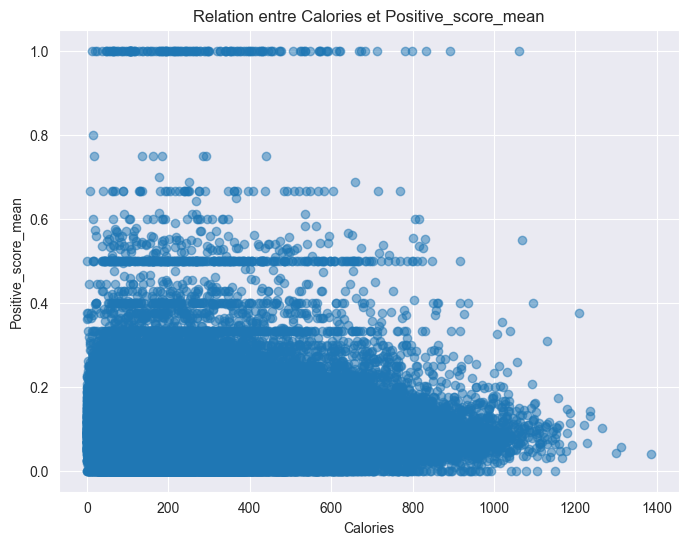

In [97]:
import matplotlib.pyplot as plt

# Exemple : Relation entre Positive_score_mean et calories
plt.figure(figsize=(8, 6))
plt.scatter(unique_recipes_df['calories'], unique_recipes_df['Positive_score_mean'], alpha=0.5)
plt.title("Relation entre Calories et Positive_score_mean")
plt.xlabel("Calories")
plt.ylabel("Positive_score_mean")
plt.show()


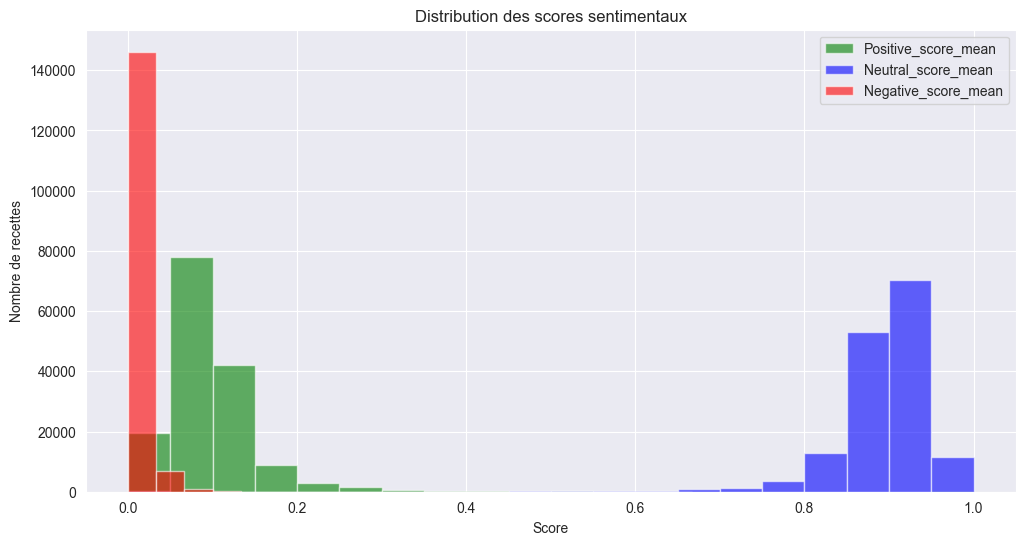

In [99]:
import matplotlib.pyplot as plt

# Créer un histogramme pour chaque score
plt.figure(figsize=(12, 6))
plt.hist(unique_recipes_df["Positive_score_mean"], bins=20, alpha=0.6, label="Positive_score_mean", color="green")
plt.hist(unique_recipes_df["Neutral_score_mean"], bins=20, alpha=0.6, label="Neutral_score_mean", color="blue")
plt.hist(unique_recipes_df["Negative_score_mean"], bins=20, alpha=0.6, label="Negative_score_mean", color="red")
plt.title("Distribution des scores sentimentaux")
plt.xlabel("Score")
plt.ylabel("Nombre de recettes")
plt.legend()
plt.show()


C:\Users\awand\AppData\Local\Temp\ipykernel_27296\25283924.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Type de score", y="Valeur du score", data=scores_long, palette="Set2")


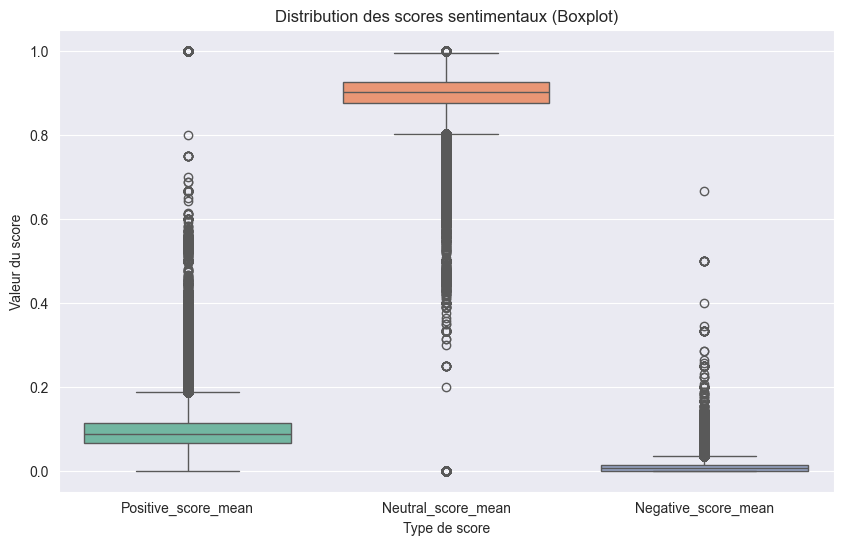

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des colonnes pour les scores (modifie si les noms sont différents)
score_columns = ["Positive_score_mean", "Neutral_score_mean", "Negative_score_mean"]

# Vérifie si toutes les colonnes existent dans le DataFrame
available_columns = [col for col in score_columns if col in unique_recipes_df.columns]

# Préparer les données au format long pour le box plot
scores_long = unique_recipes_df[available_columns].melt(
    var_name="Type de score", value_name="Valeur du score"
)

# Tracer le box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Type de score", y="Valeur du score", data=scores_long, palette="Set2")
plt.title("Distribution des scores sentimentaux (Boxplot)")
plt.xlabel("Type de score")
plt.ylabel("Valeur du score")
plt.show()
